# Setup

In [309]:
# Libarries loading

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Statistical analysis
from scipy import stats
from scipy.stats import chi2_contingency, pointbiserialr, f_oneway

# Settings
import warnings
warnings.filterwarnings('ignore')

# Mathematical operations
import math

# Preprocessing
from sklearn.preprocessing import (PowerTransformer, QuantileTransformer,
                                   RobustScaler, StandardScaler, MinMaxScaler, OrdinalEncoder, LabelEncoder)

# Modelling
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [310]:
DATASET_PATH = 'data.csv'
DATASET_TARGET = 'ExamScore'

In [311]:
# Data loading
df = pd.read_csv(DATASET_PATH)

df

StudyHours  Attendance  Resources  Extracurricular  Motivation  \
0              19          64          1                0           0   
1              19          64          1                0           0   
2              19          64          1                0           0   
3              19          64          1                1           0   
4              19          64          1                1           0   
...           ...         ...        ...              ...         ...   
13998          30          62          0                1           1   
13999          30          62          0                1           1   
14000          22          90          2                0           1   
14001          22          90          2                0           1   
14002          10          86          2                1           2   

       Internet  Gender  Age  LearningStyle  OnlineCourses  Discussions  \
0             1       0   19              2              8            1   
1             1       0   23              3             16            0   
2             1       0   28              1             19            0   
3             1       0   19              2              8            1   
4             1       0   23              3             16            0   
...         ...     ...  ...            ...            ...          ...   
13998         1       0   22              2              2            1   
13999         1       0   23              3             12            1   
14000         1       0   23              3              0            1   
14001         1       0   29              2             16            0   
14002         1       0   18              2              8            1   

       AssignmentCompletion  ExamScore  EduTech  StressLevel  FinalGrade  
0                        59         40        0            1           3  
1                        90         66        0            1           2  
2                        67         99        1            1           0  
3                        59         40        0            1           3  
4                        90         66        0            1           2  
...                     ...        ...      ...          ...         ...  
13998                   100         71        1            2           1  
13999                    72         55        1            1           2  
14000                    80         56        0            0           2  
14001                    50         62        1            2           2  
14002                    66         77        1            2           1  

[14003 rows x 16 columns]

In [312]:
# Full mapping dictionary
mapping = {
    'Gender': {0: 'Female', 1: 'Male'},
    'Resources': {0: 'Low', 1: 'Medium', 2: 'High'},
    'Extracurricular': {0: 'No', 1: 'Yes'},
    'Motivation': {0: 'Low', 1: 'Medium', 2: 'High'},
    'Internet': {0: 'No', 1: 'Yes'},
    'EduTech': {0: 'No', 1: 'Yes'},
    'StressLevel': {0: 'Low', 1: 'Medium', 2: 'High'},
    'FinalGrade': {0: 'F', 1: 'C', 2: 'B', 3: 'A'},
    'LearningStyle': {0: 'Visual', 1: 'Auditory', 2: 'Kinesthetic', 3: 'Reading'},
    'Discussions': {0: 'No', 1: 'Yes'}
}

# Replace everything at once
df = df.replace(mapping)

def standard_grade(exam_score):
    if exam_score < 60:
        return 'F'
    elif exam_score < 70:
        return 'D'
    elif exam_score < 80:
        return 'C'
    elif exam_score < 90:
        return 'B'
    else:
        return 'A'

# Apply to your data
df['FinalGrade'] = df['ExamScore'].apply(standard_grade)

df

StudyHours  Attendance Resources Extracurricular Motivation Internet  \
0              19          64    Medium              No        Low      Yes   
1              19          64    Medium              No        Low      Yes   
2              19          64    Medium              No        Low      Yes   
3              19          64    Medium             Yes        Low      Yes   
4              19          64    Medium             Yes        Low      Yes   
...           ...         ...       ...             ...        ...      ...   
13998          30          62       Low             Yes     Medium      Yes   
13999          30          62       Low             Yes     Medium      Yes   
14000          22          90      High              No     Medium      Yes   
14001          22          90      High              No     Medium      Yes   
14002          10          86      High             Yes       High      Yes   

       Gender  Age LearningStyle  OnlineCourses Discussions  \
0      Female   19   Kinesthetic              8         Yes   
1      Female   23       Reading             16          No   
2      Female   28      Auditory             19          No   
3      Female   19   Kinesthetic              8         Yes   
4      Female   23       Reading             16          No   
...       ...  ...           ...            ...         ...   
13998  Female   22   Kinesthetic              2         Yes   
13999  Female   23       Reading             12         Yes   
14000  Female   23       Reading              0         Yes   
14001  Female   29   Kinesthetic             16          No   
14002  Female   18   Kinesthetic              8         Yes   

       AssignmentCompletion  ExamScore EduTech StressLevel FinalGrade  
0                        59         40      No      Medium          F  
1                        90         66      No      Medium          D  
2                        67         99     Yes      Medium          A  
3                        59         40      No      Medium          F  
4                        90         66      No      Medium          D  
...                     ...        ...     ...         ...        ...  
13998                   100         71     Yes        High          C  
13999                    72         55     Yes      Medium          F  
14000                    80         56      No         Low          F  
14001                    50         62     Yes        High          D  
14002                    66         77     Yes        High          C  

[14003 rows x 16 columns]

# Initial inspection

In [313]:
# First 5 rows
df.head()

StudyHours  Attendance Resources Extracurricular Motivation Internet  \
0          19          64    Medium              No        Low      Yes   
1          19          64    Medium              No        Low      Yes   
2          19          64    Medium              No        Low      Yes   
3          19          64    Medium             Yes        Low      Yes   
4          19          64    Medium             Yes        Low      Yes   

   Gender  Age LearningStyle  OnlineCourses Discussions  AssignmentCompletion  \
0  Female   19   Kinesthetic              8         Yes                    59   
1  Female   23       Reading             16          No                    90   
2  Female   28      Auditory             19          No                    67   
3  Female   19   Kinesthetic              8         Yes                    59   
4  Female   23       Reading             16          No                    90   

   ExamScore EduTech StressLevel FinalGrade  
0         40      No      Medium          F  
1         66      No      Medium          D  
2         99     Yes      Medium          A  
3         40      No      Medium          F  
4         66      No      Medium          D

In [314]:
# Last 5 rows
df.tail()

StudyHours  Attendance Resources Extracurricular Motivation Internet  \
13998          30          62       Low             Yes     Medium      Yes   
13999          30          62       Low             Yes     Medium      Yes   
14000          22          90      High              No     Medium      Yes   
14001          22          90      High              No     Medium      Yes   
14002          10          86      High             Yes       High      Yes   

       Gender  Age LearningStyle  OnlineCourses Discussions  \
13998  Female   22   Kinesthetic              2         Yes   
13999  Female   23       Reading             12         Yes   
14000  Female   23       Reading              0         Yes   
14001  Female   29   Kinesthetic             16          No   
14002  Female   18   Kinesthetic              8         Yes   

       AssignmentCompletion  ExamScore EduTech StressLevel FinalGrade  
13998                   100         71     Yes        High          C  
13999                    72         55     Yes      Medium          F  
14000                    80         56      No         Low          F  
14001                    50         62     Yes        High          D  
14002                    66         77     Yes        High          C

In [315]:
# Datasets info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14003 entries, 0 to 14002
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   StudyHours            14003 non-null  int64 
 1   Attendance            14003 non-null  int64 
 2   Resources             14003 non-null  object
 3   Extracurricular       14003 non-null  object
 4   Motivation            14003 non-null  object
 5   Internet              14003 non-null  object
 6   Gender                14003 non-null  object
 7   Age                   14003 non-null  int64 
 8   LearningStyle         14003 non-null  object
 9   OnlineCourses         14003 non-null  int64 
 10  Discussions           14003 non-null  object
 11  AssignmentCompletion  14003 non-null  int64 
 12  ExamScore             14003 non-null  int64 
 13  EduTech               14003 non-null  object
 14  StressLevel           14003 non-null  object
 15  FinalGrade            14003 non-null

# Data quality inspection

In [316]:
# Find duplicates
df.duplicated().sum()

np.int64(1534)

In [317]:
# Missing data
pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Null Count': df.isnull().sum(),
    'Null %': (df.isnull().sum() / len(df) * 100).round(2),
    'Unique Values': df.nunique(),
    'Unique %': (df.nunique() / len(df) * 100).round(2),
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})

Data Type  Non-Null Count  Null Count  Null %  \
StudyHours               int64           14003           0     0.0   
Attendance               int64           14003           0     0.0   
Resources               object           14003           0     0.0   
Extracurricular         object           14003           0     0.0   
Motivation              object           14003           0     0.0   
Internet                object           14003           0     0.0   
Gender                  object           14003           0     0.0   
Age                      int64           14003           0     0.0   
LearningStyle           object           14003           0     0.0   
OnlineCourses            int64           14003           0     0.0   
Discussions             object           14003           0     0.0   
AssignmentCompletion     int64           14003           0     0.0   
ExamScore                int64           14003           0     0.0   
EduTech                 object           14003           0     0.0   
StressLevel             object           14003           0     0.0   
FinalGrade              object           14003           0     0.0   

                      Unique Values  Unique %  Missing_Count  \
StudyHours                       37      0.26              0   
Attendance                       41      0.29              0   
Resources                         3      0.02              0   
Extracurricular                   2      0.01              0   
Motivation                        3      0.02              0   
Internet                          2      0.01              0   
Gender                            2      0.01              0   
Age                              12      0.09              0   
LearningStyle                     4      0.03              0   
OnlineCourses                    21      0.15              0   
Discussions                       2      0.01              0   
AssignmentCompletion             51      0.36              0   
ExamScore                        61      0.44              0   
EduTech                           2      0.01              0   
StressLevel                       3      0.02              0   
FinalGrade                        5      0.04              0   

                      Missing_Percentage  
StudyHours                           0.0  
Attendance                           0.0  
Resources                            0.0  
Extracurricular                      0.0  
Motivation                           0.0  
Internet                             0.0  
Gender                               0.0  
Age                                  0.0  
LearningStyle                        0.0  
OnlineCourses                        0.0  
Discussions                          0.0  
AssignmentCompletion                 0.0  
ExamScore                            0.0  
EduTech                              0.0  
StressLevel                          0.0  
FinalGrade                           0.0

# Univariate analysis

In [318]:
categorical_vars = []
continuous_vars = []
binary_vars = []
ordinal_vars = []

for col in df.columns:
    unique_count = df[col].nunique()
    if unique_count == 2 and df[col].dtype == 'object':
        binary_vars.append(col)
        categorical_vars.append(col)
    elif unique_count <= 10 and df[col].dtype == 'object':
        ordinal_vars.append(col)
        categorical_vars.append(col)
    else:
        continuous_vars.append(col)


print("Categorical Variables:", categorical_vars)
print("Continuous Variables:", continuous_vars)
print("Binary Variables:", binary_vars)

Categorical Variables: ['Resources', 'Extracurricular', 'Motivation', 'Internet', 'Gender', 'LearningStyle', 'Discussions', 'EduTech', 'StressLevel', 'FinalGrade']
Continuous Variables: ['StudyHours', 'Attendance', 'Age', 'OnlineCourses', 'AssignmentCompletion', 'ExamScore']
Binary Variables: ['Extracurricular', 'Internet', 'Gender', 'Discussions', 'EduTech']


In [319]:
df[continuous_vars].describe().round(2)

StudyHours  Attendance       Age  OnlineCourses  AssignmentCompletion  \
count    14003.00    14003.00  14003.00       14003.00              14003.00   
mean        19.99       80.19     23.53           9.89                 74.50   
std          5.89       11.47      3.51           6.11                 14.63   
min          5.00       60.00     18.00           0.00                 50.00   
25%         16.00       70.00     20.00           5.00                 62.00   
50%         20.00       80.00     24.00          10.00                 74.00   
75%         24.00       90.00     27.00          15.00                 87.00   
max         44.00      100.00     29.00          20.00                100.00   

       ExamScore  
count   14003.00  
mean       70.35  
std        17.69  
min        40.00  
25%        55.00  
50%        70.00  
75%        86.00  
max       100.00

In [320]:
df[categorical_vars + binary_vars].describe()

Resources Extracurricular Motivation Internet Gender LearningStyle  \
count      14003           14003      14003    14003  14003         14003   
unique         3               2          3        2      2             4   
top       Medium             Yes     Medium      Yes   Male      Auditory   
freq        7041            8320       7098    12960   7729          3580   

       Discussions EduTech StressLevel FinalGrade Extracurricular Internet  \
count        14003   14003       14003      14003           14003    14003   
unique           2       2           3          5               2        2   
top            Yes     Yes        High          F             Yes      Yes   
freq          8484    9929        7098       4492            8320    12960   

       Gender Discussions EduTech  
count   14003       14003   14003  
unique      2           2       2  
top      Male         Yes     Yes  
freq     7729        8484    9929

## Categorical variables

In [321]:
unique_categorical_values = []

# Define known ordinal columns (based on common understanding of their labels)

ordinal_columns = [
    'Resources', 'Motivation', 'StressLevel', 'FinalGrade'
]

for col in categorical_vars:
    num_unique = df[col].nunique()
    unique_vals_list = df[col].dropna().unique().tolist()
    column_type = ""

    if num_unique == 2:
        column_type = "Binary"
    elif col in ordinal_columns:
        column_type = "Ordinal"
    else:
        column_type = "Nominal" # Default for >2 unique values not explicitly identified as ordinal

    unique_categorical_values.append({
        'Column': col,
        'Unique_Values': unique_vals_list,
        'Type': column_type
    })

unique_values_df = pd.DataFrame(unique_categorical_values)
display(unique_values_df)

Column                             Unique_Values     Type
0        Resources                       [Medium, Low, High]  Ordinal
1  Extracurricular                                 [No, Yes]   Binary
2       Motivation                       [Low, Medium, High]  Ordinal
3         Internet                                 [Yes, No]   Binary
4           Gender                            [Female, Male]   Binary
5    LearningStyle  [Kinesthetic, Reading, Auditory, Visual]  Nominal
6      Discussions                                 [Yes, No]   Binary
7          EduTech                                 [No, Yes]   Binary
8      StressLevel                       [Medium, High, Low]  Ordinal
9       FinalGrade                           [F, D, A, B, C]  Ordinal

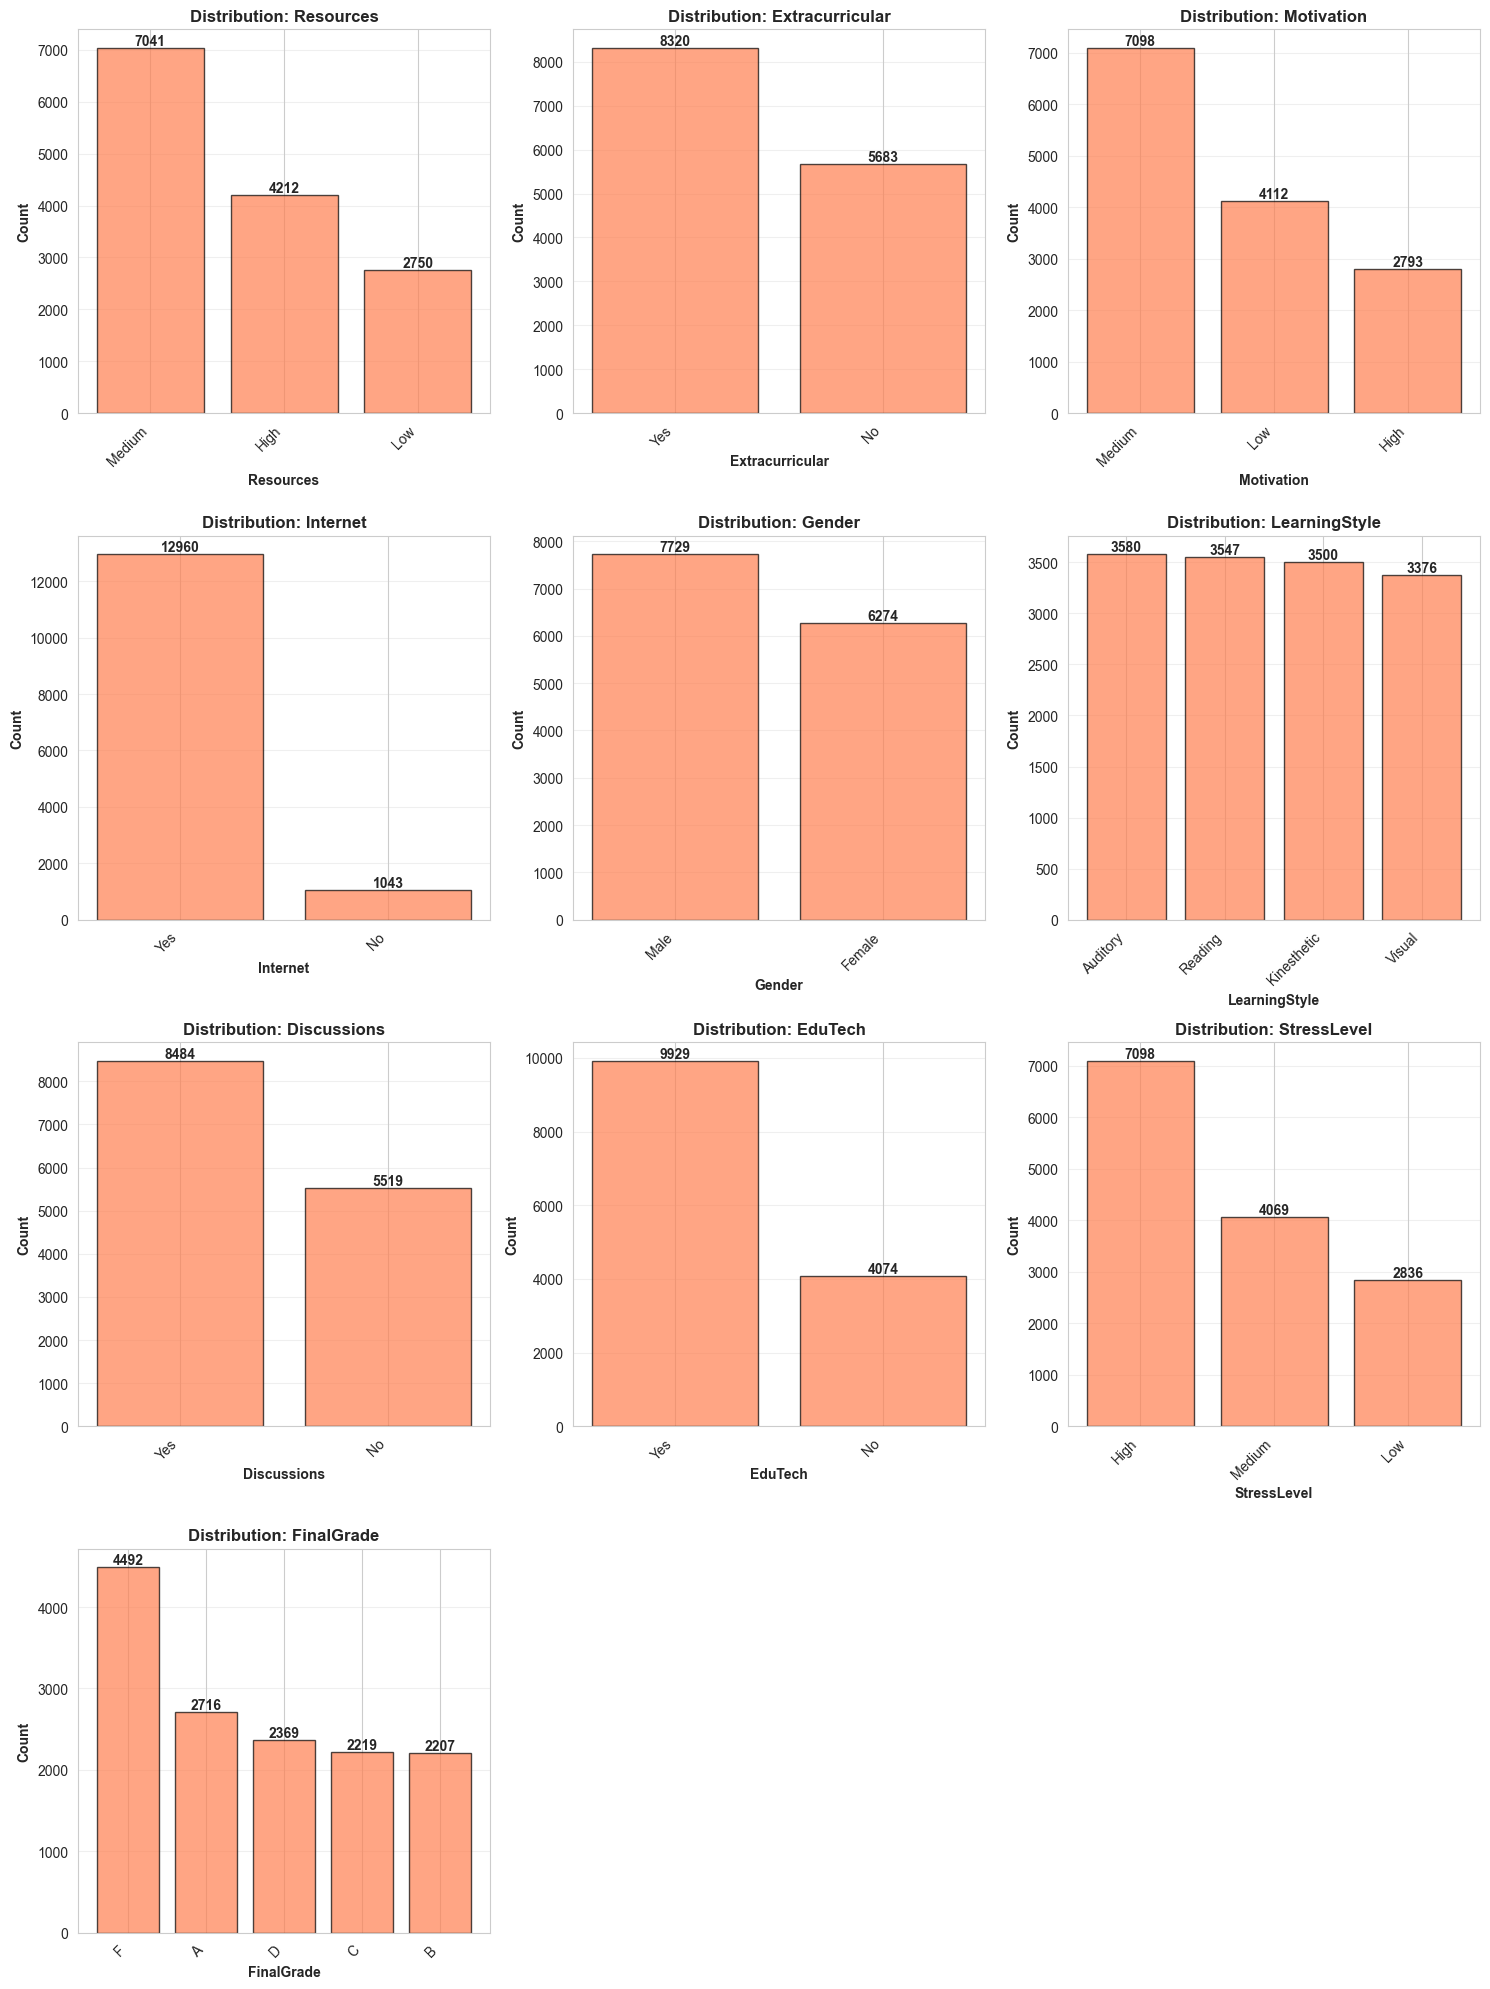

In [322]:
# Categorical Bar Plots
n_cols = 3
n_rows = (len(categorical_vars) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if len(categorical_vars) > 1 else [axes]

for idx, col in enumerate(categorical_vars):
    value_counts = df[col].value_counts()
    axes[idx].bar(range(len(value_counts)), value_counts.values,
                 color='coral', alpha=0.7, edgecolor='black')
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[idx].set_xlabel(col, fontweight='bold')
    axes[idx].set_ylabel('Count', fontweight='bold')
    axes[idx].set_title(f'Distribution: {col}', fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')

    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

for idx in range(len(categorical_vars), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

## Numeric variables

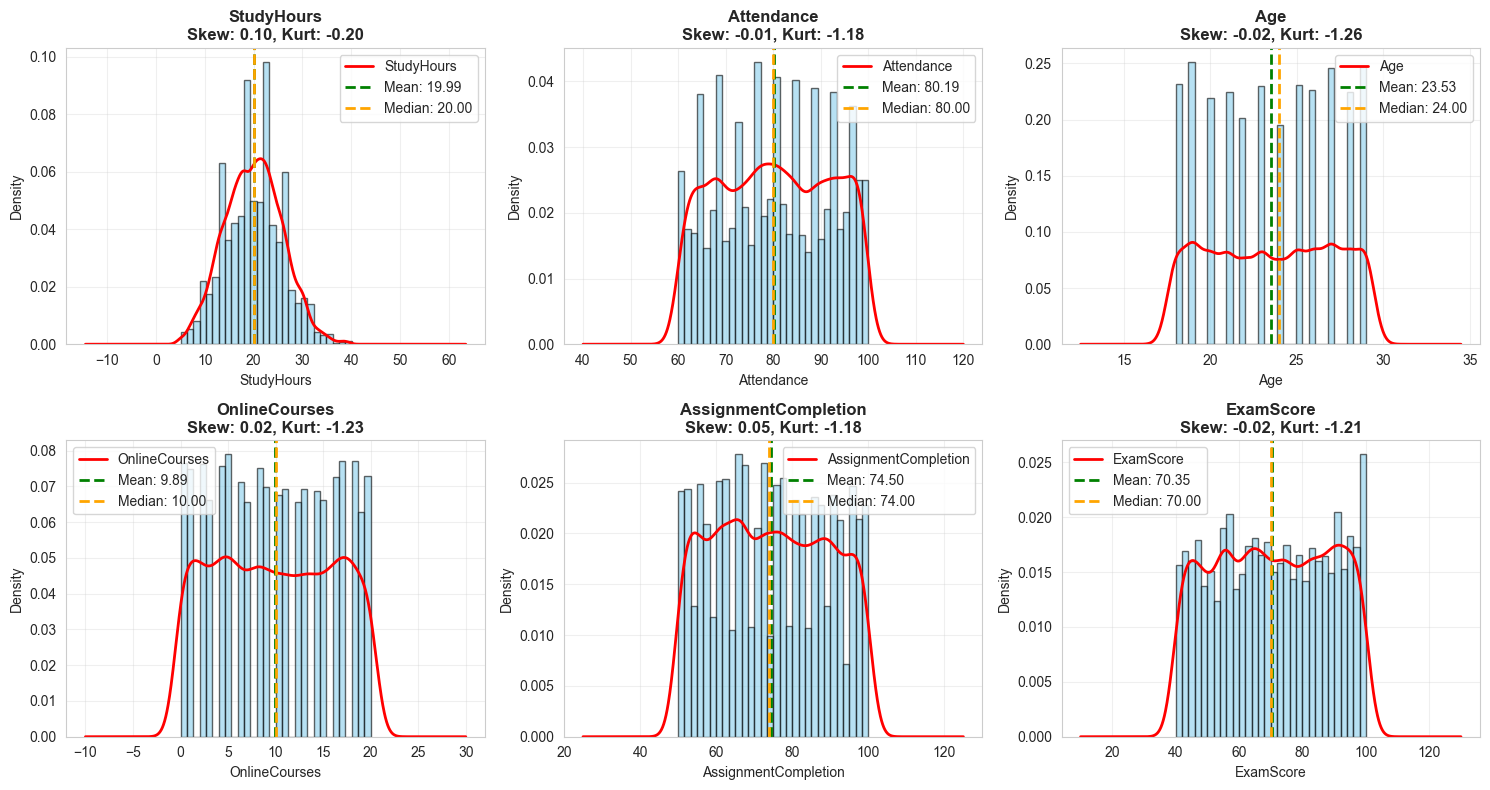

In [323]:
# Distribution plots
n_cols = len(continuous_vars)
n_rows = (n_cols + 2) // 3
fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows*4))
axes = axes.flatten() if n_cols > 1 else [axes]

for idx, col in enumerate(continuous_vars):
    ax = axes[idx]

    # Histogram with KDE
    ax.hist(df[col].dropna(), bins=30, alpha=0.6, color='skyblue', edgecolor='black', density=True)
    df[col].dropna().plot(kind='kde', ax=ax, color='red', linewidth=2)

    # Add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    ax.axvline(mean_val, color='green', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='orange', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')

    ax.set_title(f'{col}\nSkew: {df[col].skew():.2f}, Kurt: {df[col].kurtosis():.2f}',
                 fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(alpha=0.3)

# Hide empty subplots
for idx in range(n_cols, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [324]:
# Skewness and Kurtosis
def skewness_interpretation(skewness) -> str:
    if abs(skewness) < 0.5:
        return 'fairly symmetric'
    elif 0.5 <= abs(skewness) <= 1:
        return 'moderately skewed'
    return 'highly skewed'

skewness = [df[col].skew() for col in continuous_vars]
kurotosis = [df[col].kurtosis() for col in continuous_vars]
interpretation = [skewness_interpretation(i) for i in skewness]

additional_stats = pd.DataFrame({
    'Column': continuous_vars,
    'Skewness': skewness,
    'Kurtosis': kurotosis,
    'Interpretation': interpretation
}).round(3)

additional_stats

Column  Skewness  Kurtosis    Interpretation
0            StudyHours     0.098    -0.197  fairly symmetric
1            Attendance    -0.012    -1.177  fairly symmetric
2                   Age    -0.016    -1.264  fairly symmetric
3         OnlineCourses     0.022    -1.232  fairly symmetric
4  AssignmentCompletion     0.049    -1.181  fairly symmetric
5             ExamScore    -0.018    -1.209  fairly symmetric

In [325]:
# Outlier detection
outlier_summary = []
for col in continuous_vars:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    outlier_summary.append({
        'Column': col,
        'Outlier_Count': len(outliers),
        'Outlier_Percentage': f"{(len(outliers)/len(df)*100):.2f}%",
        'Lower_Bound': f"{lower_bound:.2f}",
        'Upper_Bound': f"{upper_bound:.2f}"
    })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df

Column  Outlier_Count Outlier_Percentage Lower_Bound  \
0            StudyHours             45              0.32%        4.00   
1            Attendance              0              0.00%       40.00   
2                   Age              0              0.00%        9.50   
3         OnlineCourses              0              0.00%      -10.00   
4  AssignmentCompletion              0              0.00%       24.50   
5             ExamScore              0              0.00%        8.50   

  Upper_Bound  
0       36.00  
1      120.00  
2       37.50  
3       30.00  
4      124.50  
5      132.50

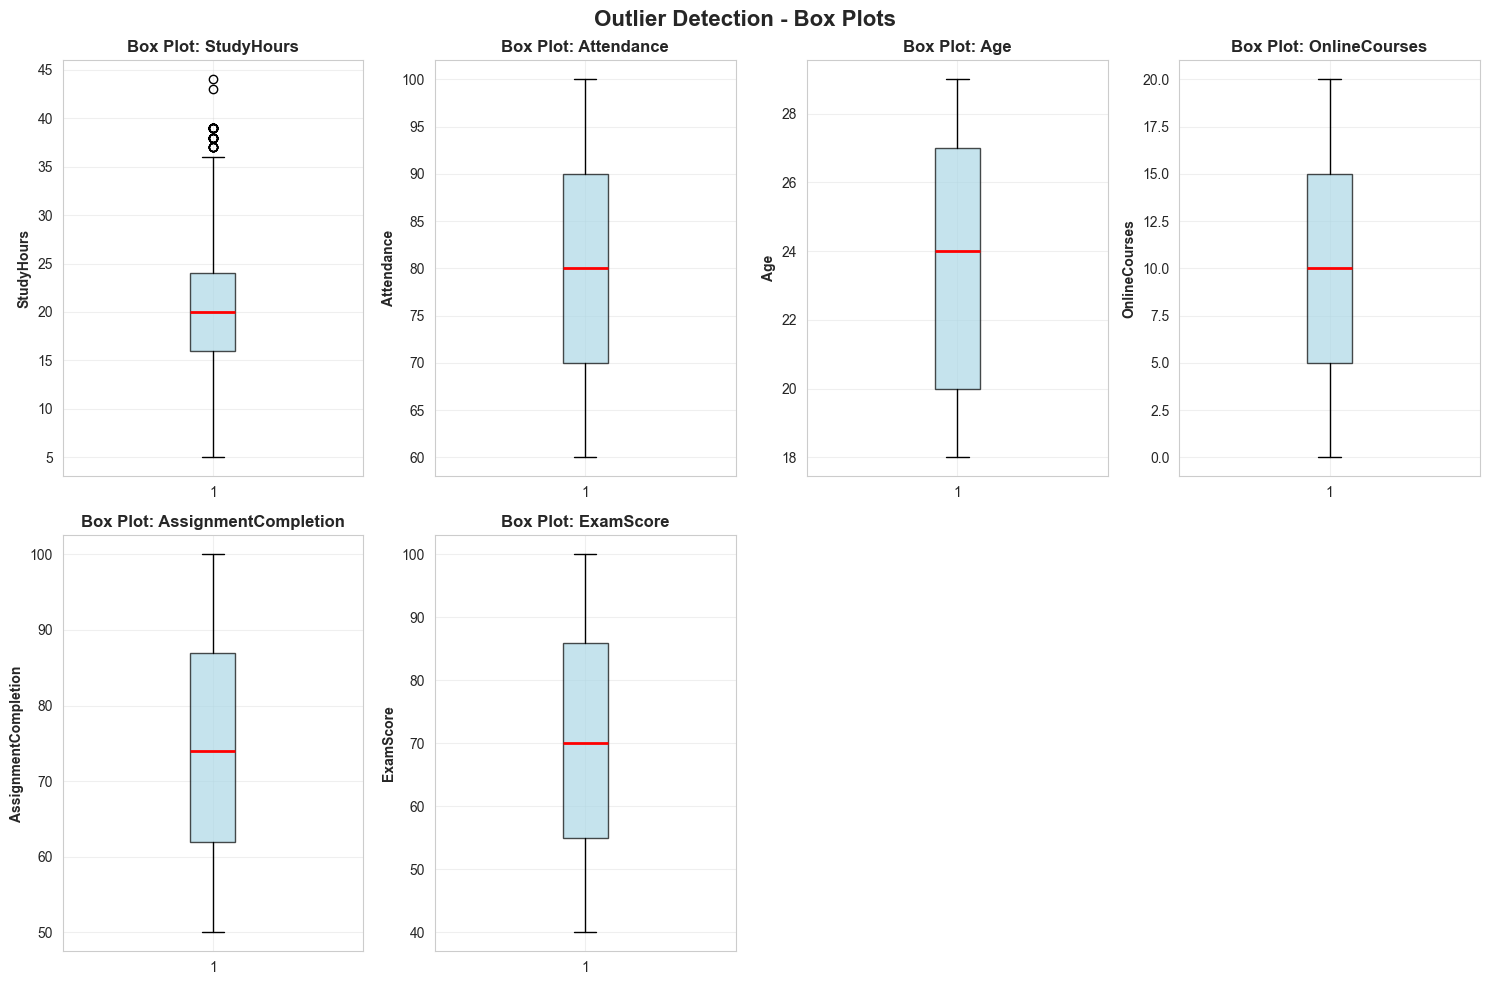

In [326]:
# Outlier visualization
if len(continuous_vars) > 0:
    n_cols = 4
    n_rows = (len(continuous_vars) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if len(continuous_vars) > 1 else [axes]

    for idx, col in enumerate(continuous_vars):
        axes[idx].boxplot(df[col].dropna(), vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightblue', alpha=0.7),
                         medianprops=dict(color='red', linewidth=2))
        axes[idx].set_ylabel(col, fontweight='bold')
        axes[idx].set_title(f'Box Plot: {col}', fontweight='bold')
        axes[idx].grid(True, alpha=0.3)

    for idx in range(len(continuous_vars), len(axes)):
        axes[idx].axis('off')

    plt.suptitle('Outlier Detection - Box Plots', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Bivariate analysis

## Correlation matrix

In [327]:
# Helper class
class CategoricalCorrelation:
    def __init__(self, df):
        self.df = df

    @staticmethod
    def cramers_v(confusion_matrix):
        chi2 = chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum().sum() # Fix: Ensure n is a scalar (total sum)
        min_dim = min(confusion_matrix.shape) - 1
        if min_dim == 0:
            return 0
        return np.sqrt(chi2 / (n * min_dim))

    @staticmethod
    def theils_u(x, y):
        confusion_matrix = pd.crosstab(x, y)
        n = confusion_matrix.sum().sum()
        p_x = confusion_matrix.sum(axis=1) / n
        p_y = confusion_matrix.sum(axis=0) / n
        p_xy = confusion_matrix / n
        h_x = -np.sum(p_x * np.log(p_x + 1e-10))
        h_xy = 0
        for j in range(len(p_y)):
            if p_y.iloc[j] > 0:
                p_x_given_y = p_xy.iloc[:, j] / p_y.iloc[j]
                h_xy += p_y.iloc[j] * (-np.sum(p_x_given_y * np.log(p_x_given_y + 1e-10)))
        if h_x == 0:
            return 0
        return (h_x - h_xy) / h_x

    @staticmethod
    def correlation_ratio(categories, values):
        # Handle missing values by dropping rows where either category or value is NaN
        temp_df = pd.DataFrame({'categories': categories, 'values': values}).dropna()

        if temp_df.empty:
            return 0  # Return 0 or NaN if no valid data points remain

        categories = np.array(temp_df['categories'])
        values = np.array(temp_df['values'])

        mean_total = np.mean(values)
        categories_unique = np.unique(categories)
        ss_between = 0
        for cat in categories_unique:
            values_cat = values[categories == cat]
            n_cat = len(values_cat)
            mean_cat = np.mean(values_cat)
            ss_between += n_cat * (mean_cat - mean_total) ** 2
        ss_total = np.sum((values - mean_total) ** 2)
        if ss_total == 0:
            return 0
        return np.sqrt(ss_between / ss_total)

    def chi_square_test(self, var1, var2):
        confusion_matrix = pd.crosstab(self.df[var1], self.df[var2])
        chi2, p_value, dof, expected = chi2_contingency(confusion_matrix)
        cramers = self.cramers_v(confusion_matrix)
        return {
            'chi2': chi2,
            'p_value': p_value,
            'dof': dof,
            'cramers_v': cramers
        }

    def point_biserial(self, binary_var, continuous_var):
        binary_series = self.df[binary_var].copy()
        continuous_series = self.df[continuous_var].copy()

        # Convert binary_var to numeric (0/1) if it's not already
        if binary_series.dtype == 'object':
            binary_series_numeric, _ = pd.factorize(binary_series)
            binary_series = pd.Series(binary_series_numeric, index=binary_series.index)

        # Drop NaNs before correlation calculation to avoid issues
        temp_df = pd.DataFrame({
            'binary': binary_series,
            'continuous': continuous_series
        }).dropna()

        if temp_df.empty:
            # Return NaNs if there's no valid data after dropping NaNs
            return {'correlation': np.nan, 'p_value': np.nan}

        corr, p_value = pointbiserialr(temp_df['binary'], temp_df['continuous'])
        return {'correlation': corr, 'p_value': p_value}

    def anova_test(self, categorical_var, continuous_var):
        groups = [group[continuous_var].values for name, group in self.df.groupby(categorical_var)]
        f_stat, p_value = stats.f_oneway(*groups)
        eta = self.correlation_ratio(self.df[categorical_var], self.df[continuous_var])
        return {
            'f_statistic': f_stat,
            'p_value': p_value,
            'eta': eta,
            'eta_squared': eta ** 2
        }

    def categorical_correlation_matrix(self, categorical_vars, method='cramers_v'):
        n_vars = len(categorical_vars)
        corr_matrix = np.zeros((n_vars, n_vars))
        for i, var1 in enumerate(categorical_vars):
            for j, var2 in enumerate(categorical_vars):
                if i == j:
                    corr_matrix[i, j] = 1.0
                else:
                    if method == 'cramers_v':
                        confusion_matrix = pd.crosstab(self.df[var1], self.df[var2])
                        corr_matrix[i, j] = self.cramers_v(confusion_matrix)
                    elif method == 'theils_u':
                        corr_matrix[i, j] = self.theils_u(self.df[var1], self.df[var2])
        return pd.DataFrame(corr_matrix, index=categorical_vars, columns=categorical_vars)

    def mixed_correlation_analysis(self, categorical_vars, continuous_vars):
        n_cat = len(categorical_vars)
        n_cont = len(continuous_vars)
        corr_matrix = np.zeros((n_cat, n_cont))
        for i, cat_var in enumerate(categorical_vars):
            for j, cont_var in enumerate(continuous_vars):
                eta = self.correlation_ratio(self.df[cat_var], self.df[cont_var])
                corr_matrix[i, j] = eta
        return pd.DataFrame(corr_matrix, index=categorical_vars, columns=continuous_vars)

In [328]:
analyzer = CategoricalCorrelation(df)

### Correlation matrix between continous and continous

In [329]:
# Create subsets for each grade, keeping only numeric variables
df_F_graded = df[df['FinalGrade'] == 'F'][continuous_vars]
df_D_graded = df[df['FinalGrade'] == 'D'][continuous_vars]
df_C_graded = df[df['FinalGrade'] == 'C'][continuous_vars]
df_B_graded = df[df['FinalGrade'] == 'B'][continuous_vars]
df_A_graded = df[df['FinalGrade'] == 'A'][continuous_vars]

# Mapping for easier readability
df_grade_mapping = {
    'F graded': df_F_graded,
    'D graded': df_D_graded,
    'C graded': df_C_graded,
    'B graded': df_B_graded,
    'A graded': df_A_graded
}

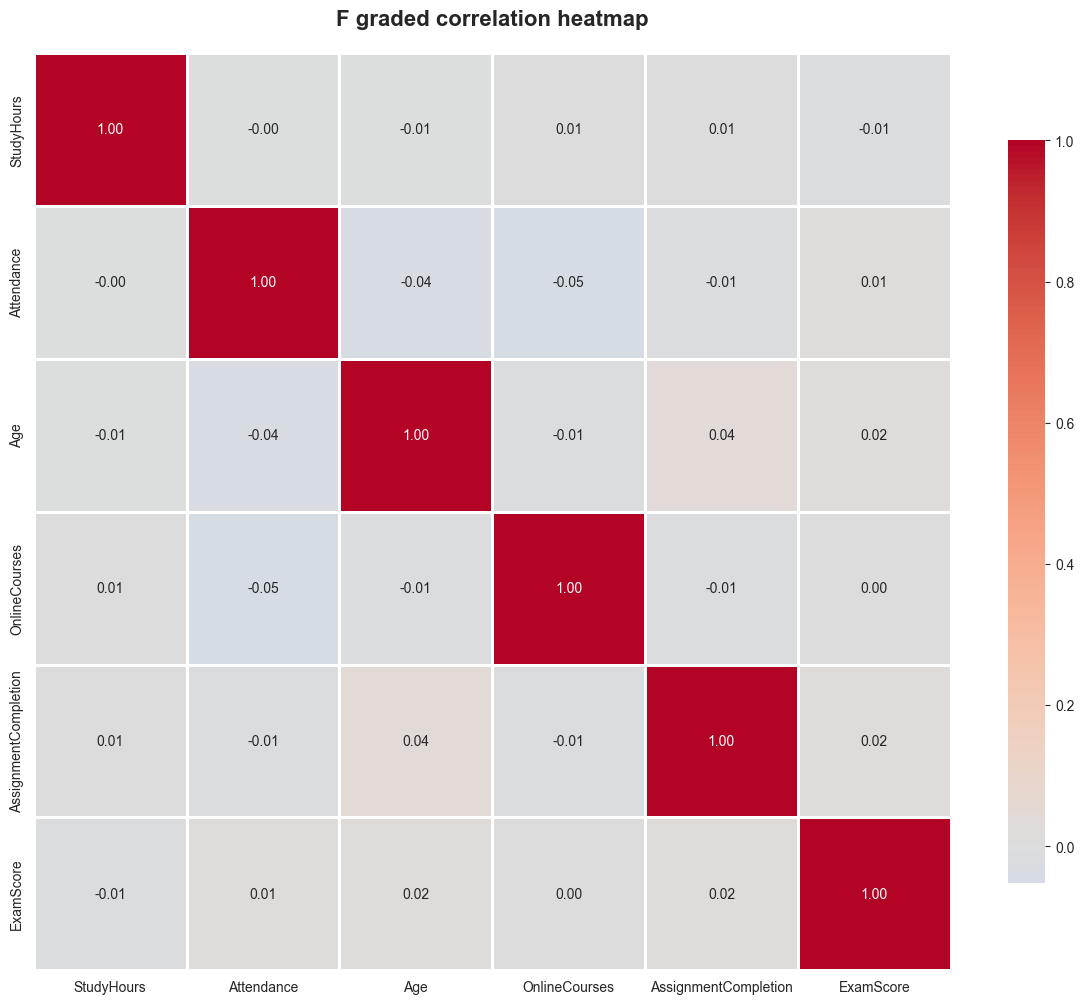

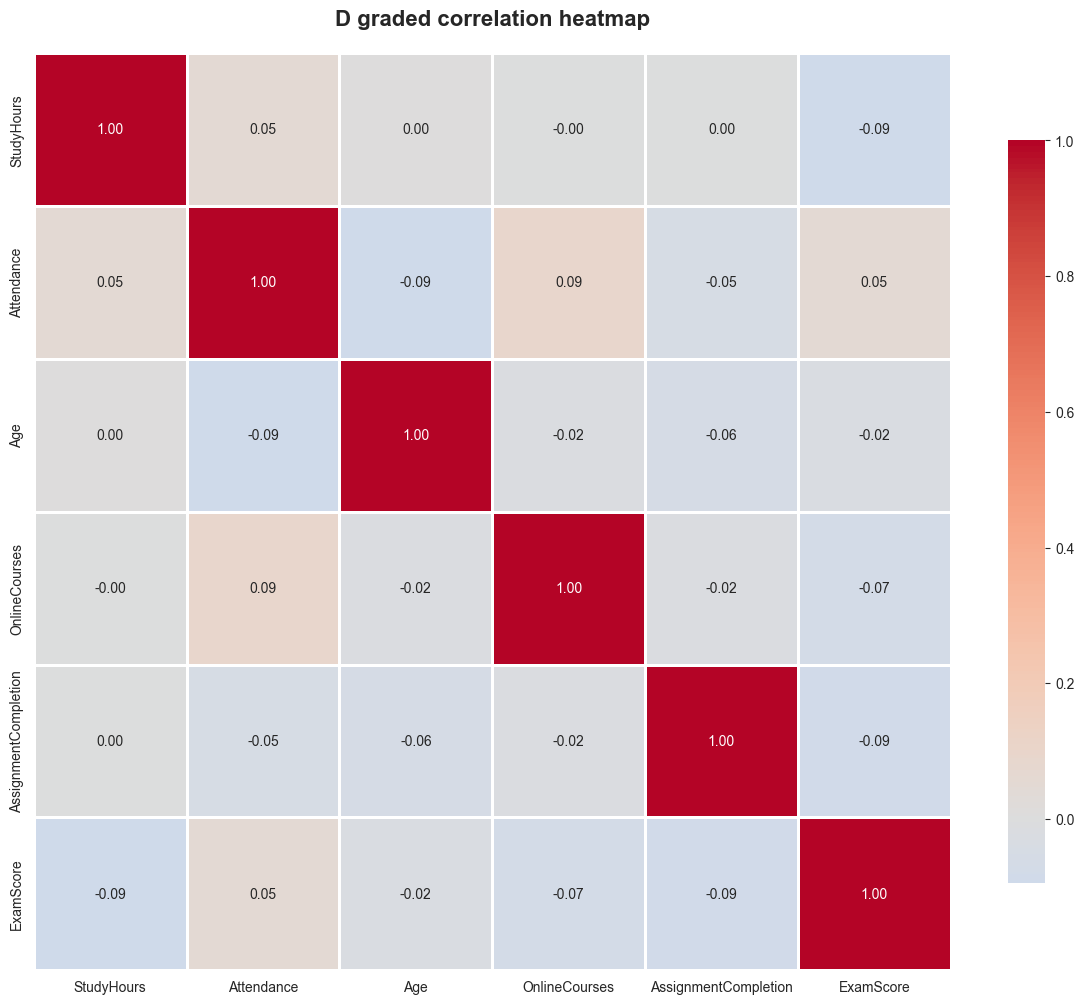

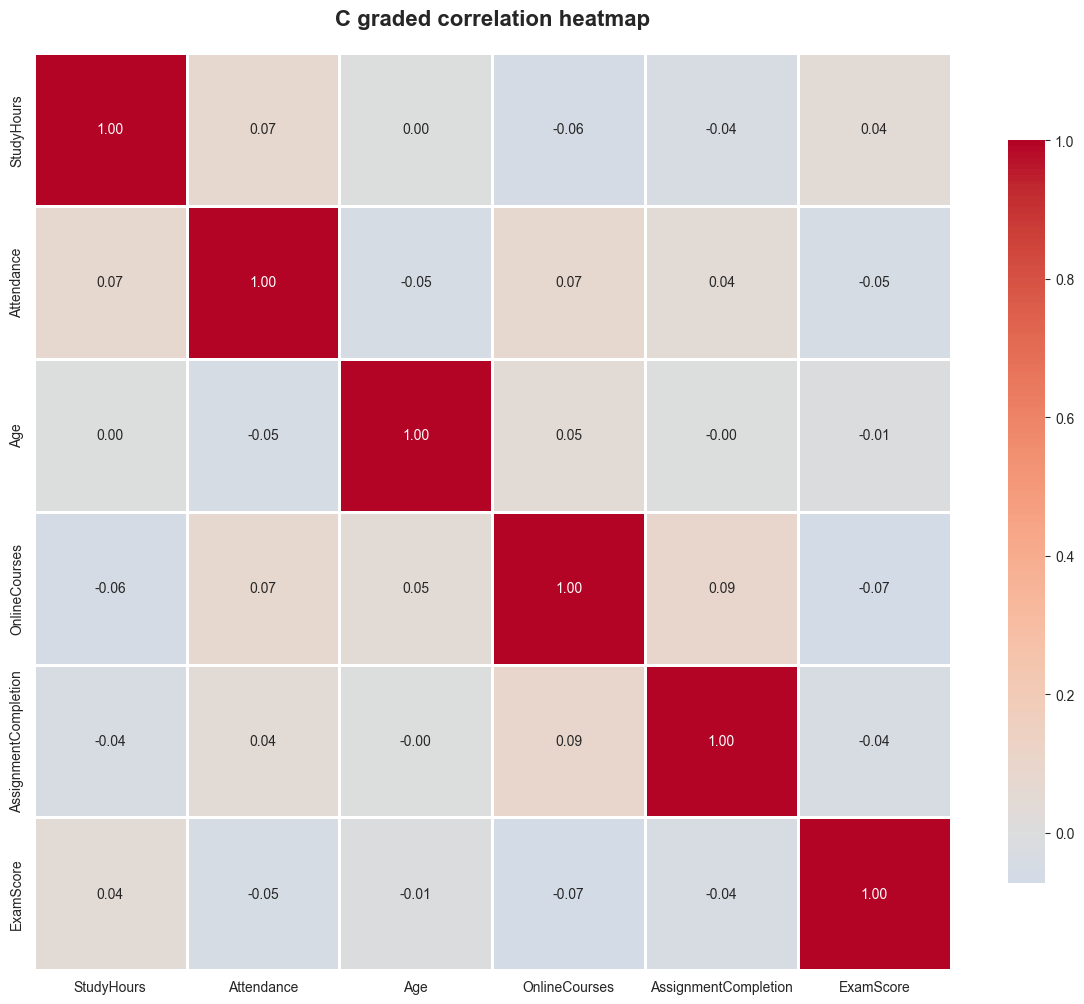

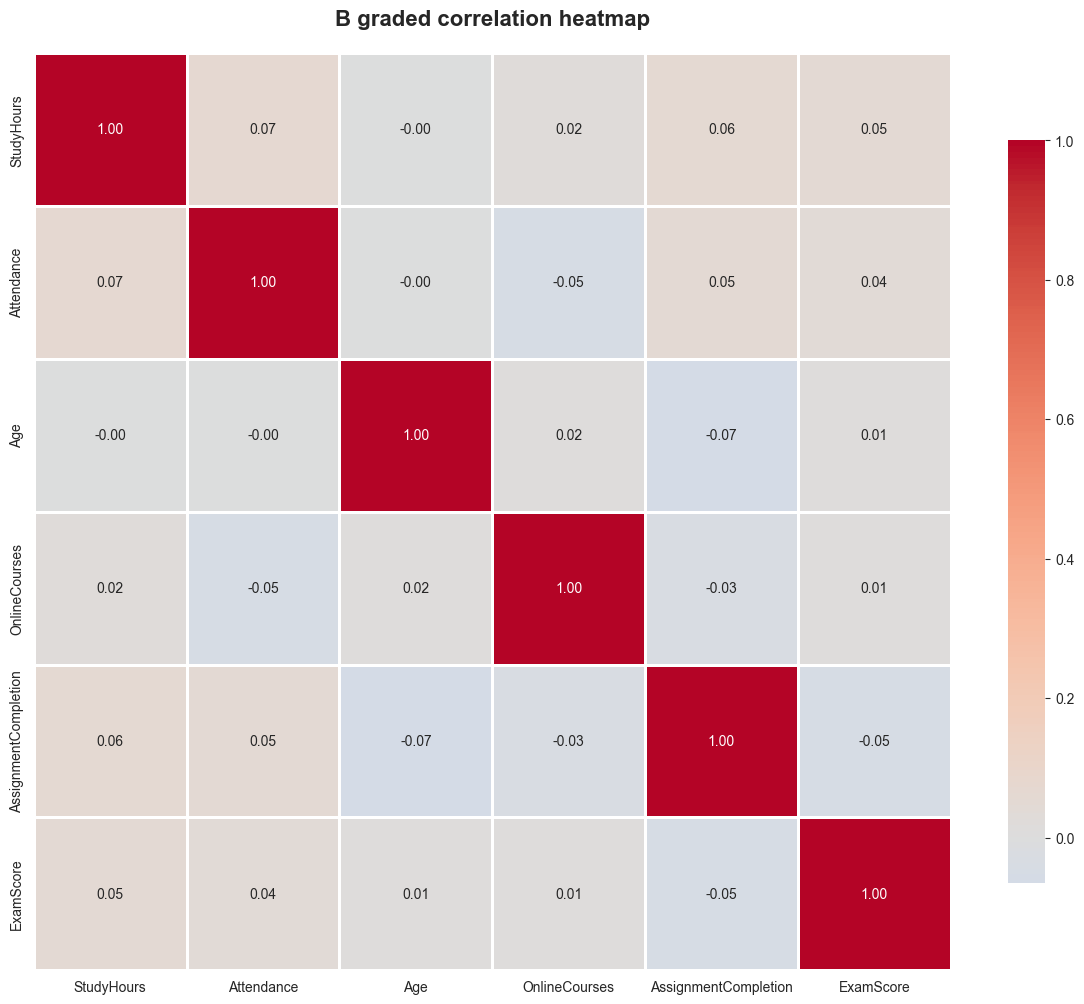

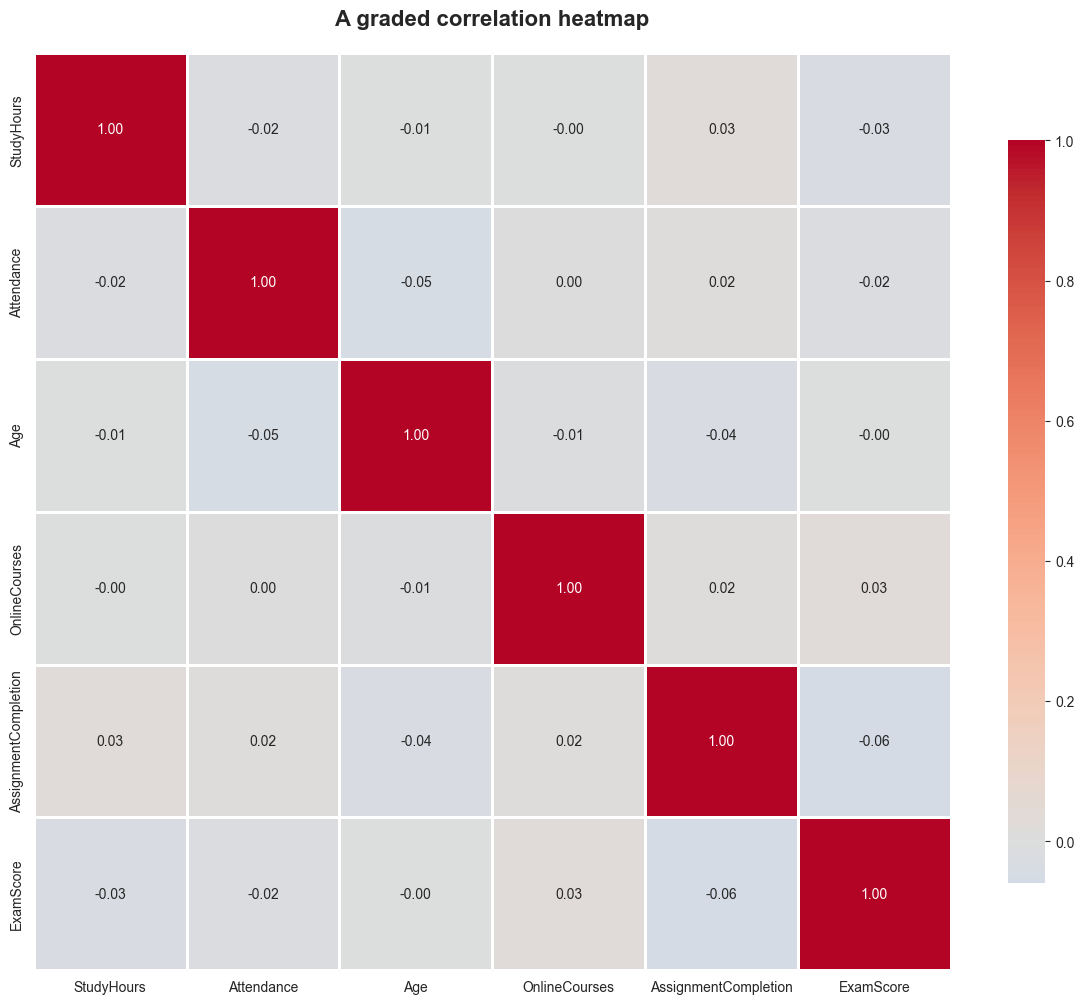

In [330]:
# Correlation matrix
for df_name in df_grade_mapping.keys():
    correlation_matrix = df_grade_mapping[df_name].corr()
    correlation_matrix.round(3)
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title(f'{df_name} correlation heatmap', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

### Correlation between categorical and categorical

In [331]:
# Drop Final Grade
df_no_grade = df.drop('FinalGrade', axis=1)

analyzer_no_grade = CategoricalCorrelation(df_no_grade)

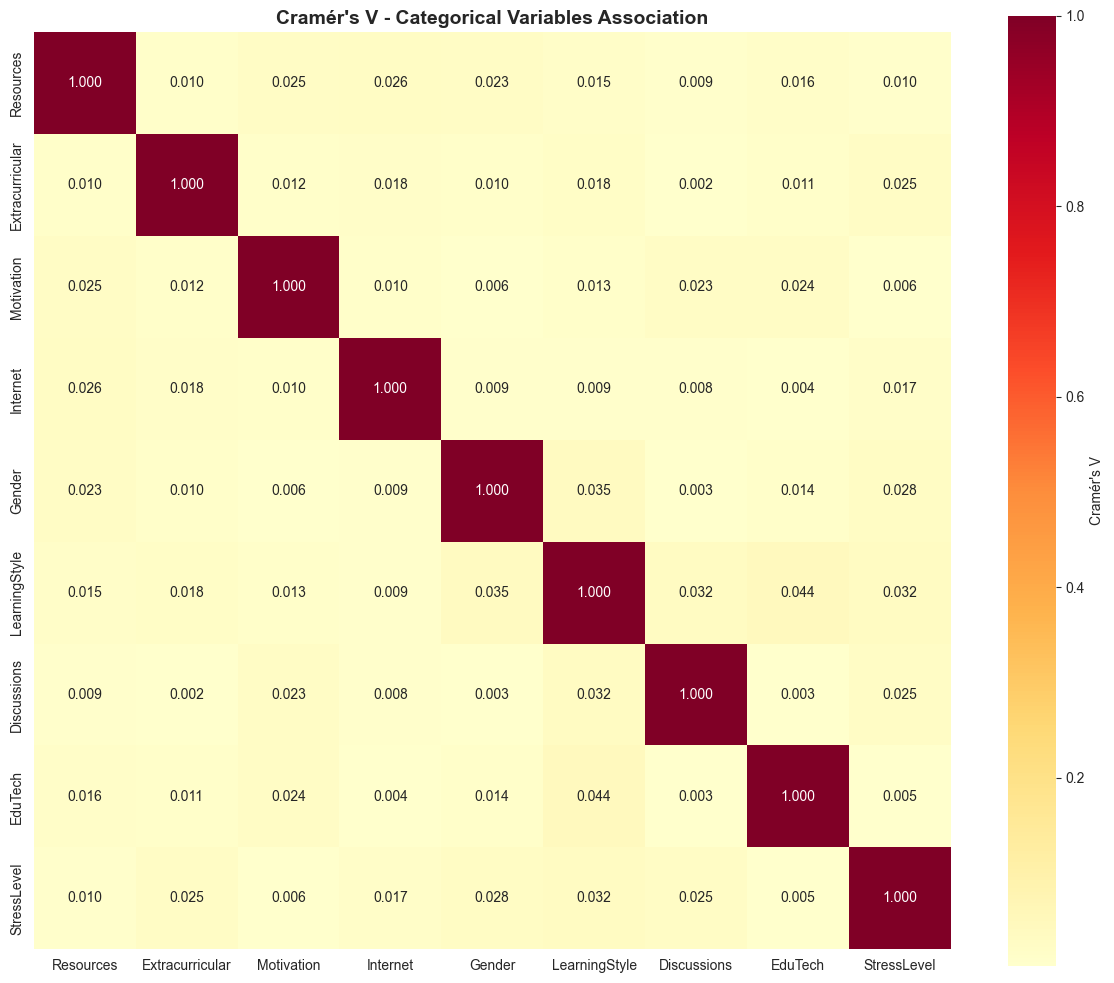

In [332]:
categorical_vars_no_grade = [col for col in categorical_vars if col != 'FinalGrade']    
cramers_matrix = analyzer_no_grade.categorical_correlation_matrix(categorical_vars_no_grade, method='cramers_v')

for i in range(len(categorical_vars_no_grade)):
    for j in range(i+1, len(categorical_vars_no_grade)):
        if cramers_matrix.iloc[i, j] > 0.2:
            print(f"  {categorical_vars_no_grade[i]} ↔ {categorical_vars_no_grade[j]}: {cramers_matrix.iloc[i, j]:.3f}")

# Visualize
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_matrix, annot=True, fmt='.3f', cmap='YlOrRd',
            square=True, cbar_kws={'label': "Cramér's V"})
plt.title("Cramér's V - Categorical Variables Association", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Correlation matrix between categorical and continous

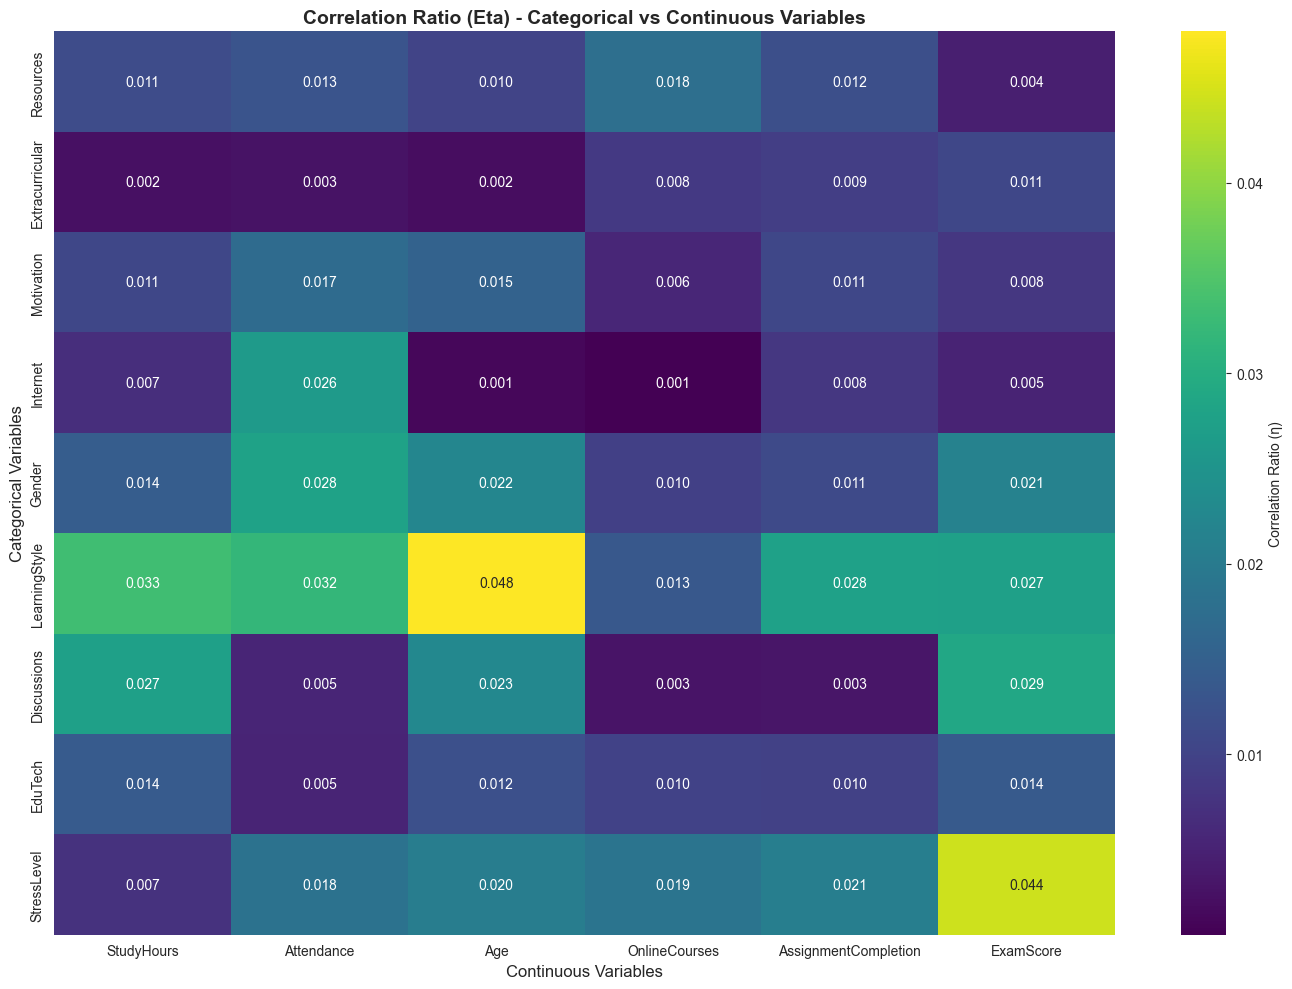

In [333]:
mixed_corr = analyzer_no_grade.mixed_correlation_analysis(categorical_vars_no_grade, continuous_vars)

for cat_var in categorical_vars_no_grade:
    for cont_var in continuous_vars:
        eta_val = mixed_corr.loc[cat_var, cont_var]
        if eta_val > 0.2:
            print(f"  {cat_var} → {cont_var}: η = {eta_val:.3f} (explains {eta_val**2:.1%} of variance)")

# Visualize
plt.figure(figsize=(14, 10))
sns.heatmap(mixed_corr, annot=True, fmt='.3f', cmap='viridis',
            cbar_kws={'label': 'Correlation Ratio (η)'})
plt.title("Correlation Ratio (Eta) - Categorical vs Continuous Variables",
            fontsize=14, fontweight='bold')
plt.xlabel("Continuous Variables", fontsize=12)
plt.ylabel("Categorical Variables", fontsize=12)
plt.tight_layout()
plt.show()

### Correlation with Exam Score summary


All factors ranked by effect size:
            Variable           Test  Statistic  P-value  Effect_Size  Significant
         StressLevel          ANOVA  13.804675 0.000001     0.044365         True
         Discussions Point-Biserial   0.028813 0.000650     0.028813         True
       LearningStyle          ANOVA   3.479454 0.015209     0.027296         True
AssignmentCompletion        Pearson   0.025288 0.002765     0.025288         True
              Gender Point-Biserial   0.021342 0.011553     0.021342         True
       OnlineCourses        Pearson   0.021024 0.012848     0.021024         True
          Attendance        Pearson  -0.014681 0.082360     0.014681        False
             EduTech Point-Biserial   0.013773 0.103155     0.013773        False
     Extracurricular Point-Biserial  -0.010561 0.211442     0.010561        False
          Motivation          ANOVA   0.449354 0.638050     0.008012        False
                 Age        Pearson  -0.007193 0.394734     0.

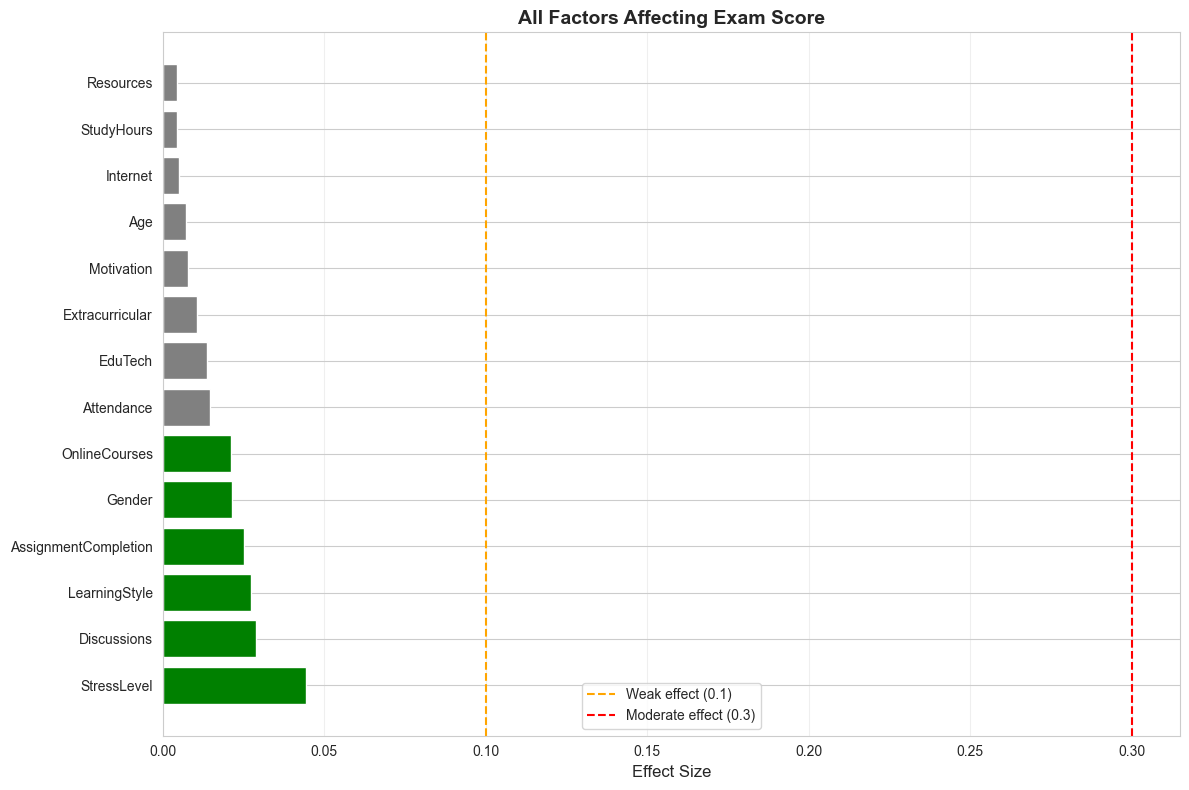

In [334]:
results_list = []

for var in df.columns:
    if var == DATASET_TARGET or var == 'FinalGrade':
        continue

    result = {'Variable': var}

    # Determine variable type
    if var in binary_vars:

        # Point-biserial correlation
        pb_result = analyzer_no_grade.point_biserial(var, DATASET_TARGET)
        result['Test'] = 'Point-Biserial'
        result['Statistic'] = pb_result['correlation']
        result['P-value'] = pb_result['p_value']
        result['Effect_Size'] = abs(pb_result['correlation'])

    elif var in categorical_vars:
        anova_result = analyzer_no_grade.anova_test(var, DATASET_TARGET)
        result['Test'] = 'ANOVA'
        result['Statistic'] = anova_result['f_statistic']
        result['P-value'] = anova_result['p_value']
        result['Effect_Size'] = anova_result['eta']

    else:

        corr, p_val = stats.pearsonr(df[var].dropna(), df[DATASET_TARGET].dropna())
        result['Test'] = 'Pearson'
        result['Statistic'] = corr
        result['P-value'] = p_val
        result['Effect_Size'] = abs(corr)

    results_list.append(result)

results_df = pd.DataFrame(results_list)
results_df['Significant'] = results_df['P-value'] < 0.05
results_df = results_df.sort_values('Effect_Size', ascending=False)

print("\nAll factors ranked by effect size:")
print(results_df.to_string(index=False))

# Visualize ALL factors (removed top_n limit)
all_factors = results_df

# Adjust figure size dynamically based on the number of factors
fig_height = max(8, len(all_factors) * 0.5) # Minimum height 8, 0.5 inches per factor
plt.figure(figsize=(12, fig_height))
colors = ['green' if sig else 'gray' for sig in all_factors['Significant']]
plt.barh(range(len(all_factors)), all_factors['Effect_Size'], color=colors)
plt.yticks(range(len(all_factors)), all_factors['Variable'])
plt.xlabel('Effect Size', fontsize=12)
plt.title(f'All Factors Affecting Exam Score', fontsize=14, fontweight='bold')
plt.axvline(x=0.1, color='orange', linestyle='--', label='Weak effect (0.1)')
plt.axvline(x=0.3, color='red', linestyle='--', label='Moderate effect (0.3)')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## Pairplot

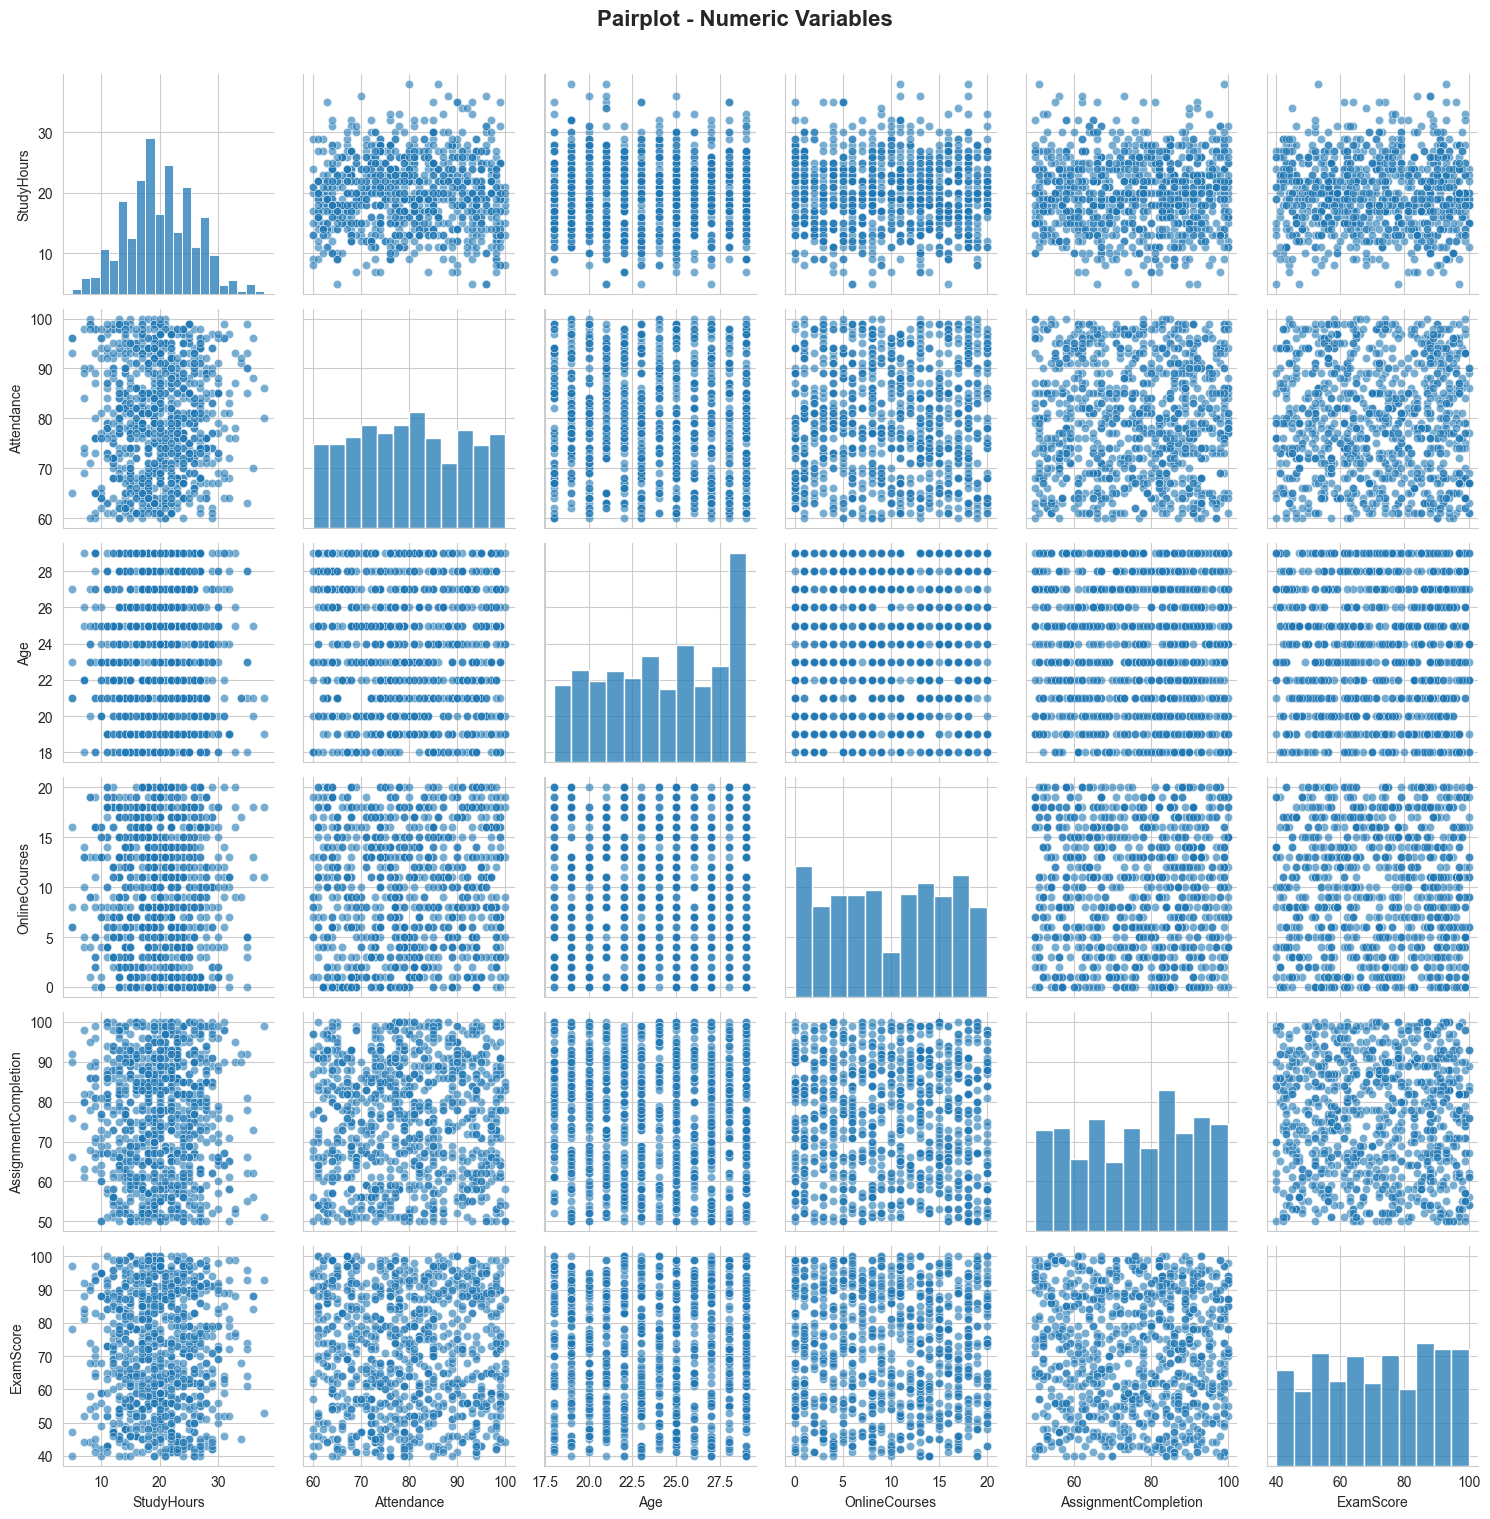

In [335]:
#Pairplot
sample_size = min(1000, len(df))
df_sample = df.sample(n=sample_size, random_state=42)

pairplot = sns.pairplot(df_sample, diag_kind='hist', plot_kws={'alpha': 0.6})
pairplot.fig.suptitle('Pairplot - Numeric Variables', fontsize=16, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

## Frequency histogram

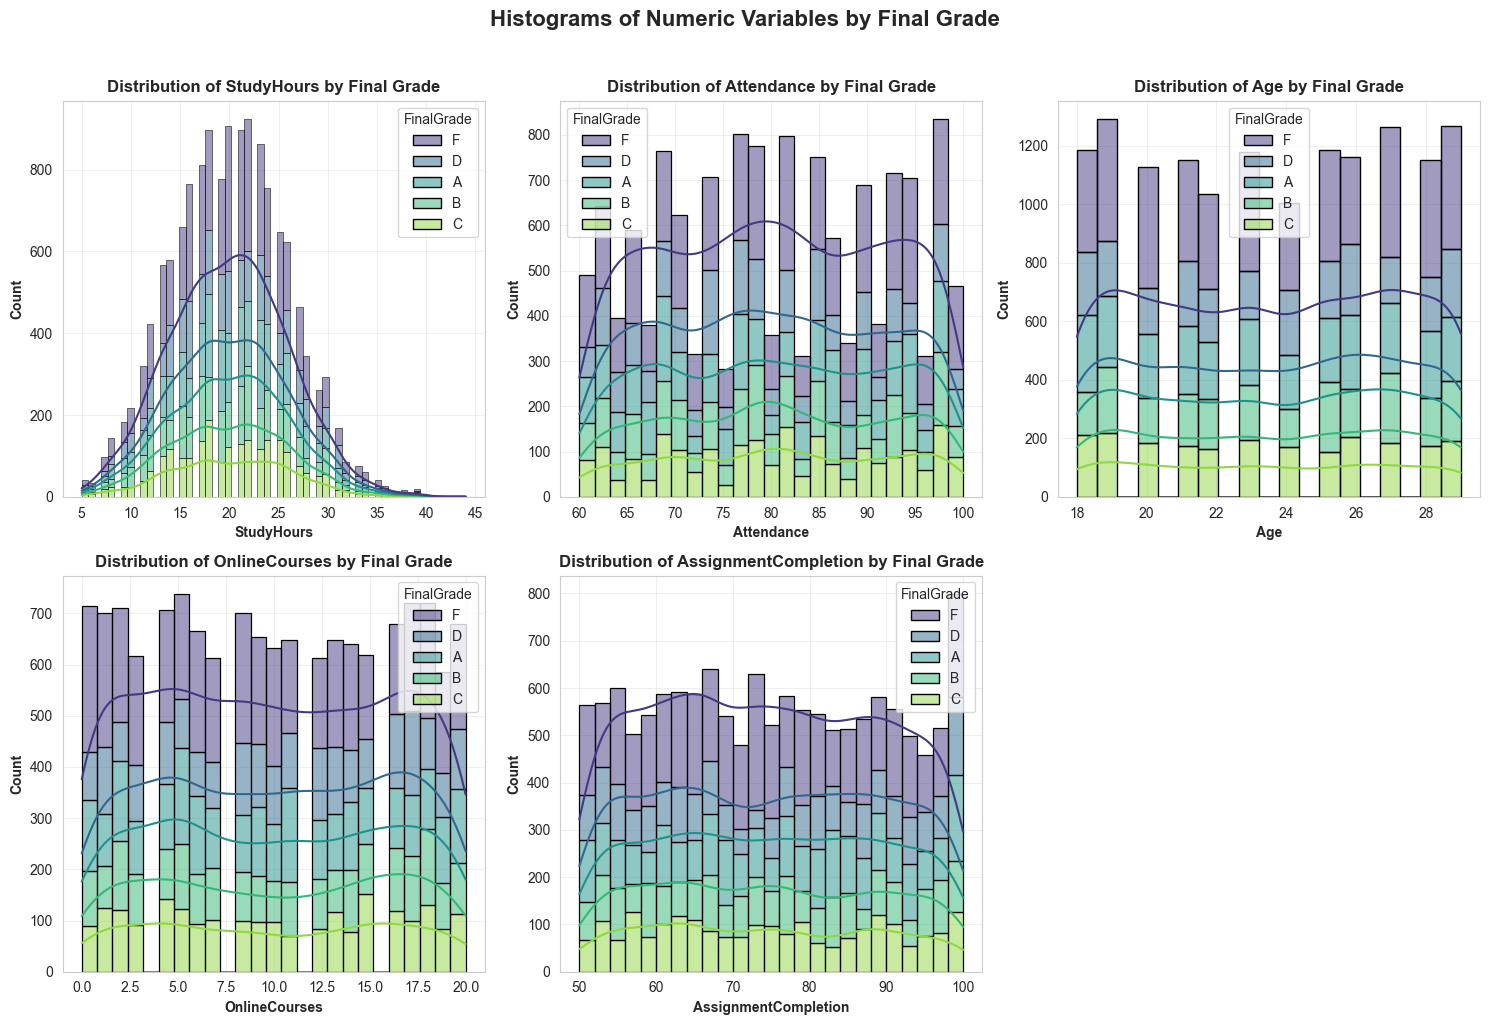

In [336]:
continuous_vars_no_target = [col for col in continuous_vars if col != DATASET_TARGET]
n_cols = 3
n_rows = (len(continuous_vars_no_target) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten() if len(continuous_vars_no_target) > 1 else [axes]

for idx, col in enumerate(continuous_vars_no_target):
    ax = axes[idx]
    sns.histplot(data=df, x=col, hue='FinalGrade', multiple='stack', palette='viridis', ax=ax, kde=True, edgecolor='black')
    ax.set_title(f'Distribution of {col} by Final Grade', fontweight='bold')
    ax.set_xlabel(col, fontweight='bold')
    ax.set_ylabel('Count', fontweight='bold')
    ax.grid(True, alpha=0.3)

for idx in range(len(continuous_vars_no_target), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Histograms of Numeric Variables by Final Grade', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Target analysis

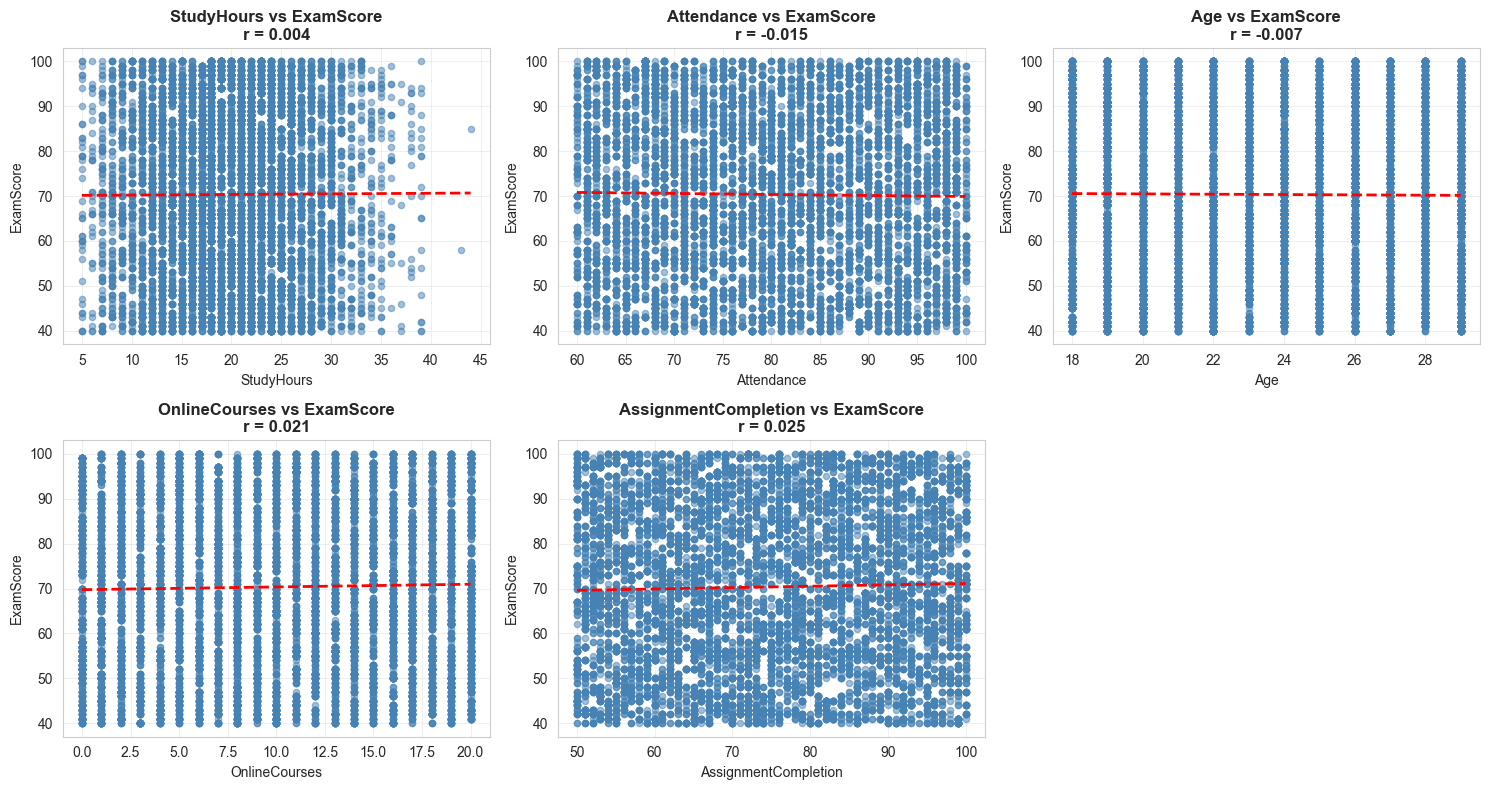

In [337]:
n_plots = min(len(continuous_vars_no_target), 9)
n_rows = (n_plots + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows*4))
axes = axes.flatten() if n_plots > 1 else [axes]

for idx, col in enumerate(continuous_vars_no_target[:n_plots]):
    ax = axes[idx]
    ax.scatter(df[col], df[DATASET_TARGET], alpha=0.5, s=20, color='steelblue')

    # Add regression line
    z = np.polyfit(df[col].dropna(), df[DATASET_TARGET].dropna(), 1)
    p = np.poly1d(z)
    x_line = np.linspace(df[col].min(), df[col].max(), 100)
    ax.plot(x_line, p(x_line), "r--", linewidth=2)

    # Calculate correlation
    corr = df[[col, DATASET_TARGET]].corr().iloc[0, 1]
    ax.set_title(f'{col} vs {DATASET_TARGET}\nr = {corr:.3f}', fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel(DATASET_TARGET)
    ax.grid(alpha=0.3)

for idx in range(n_plots, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

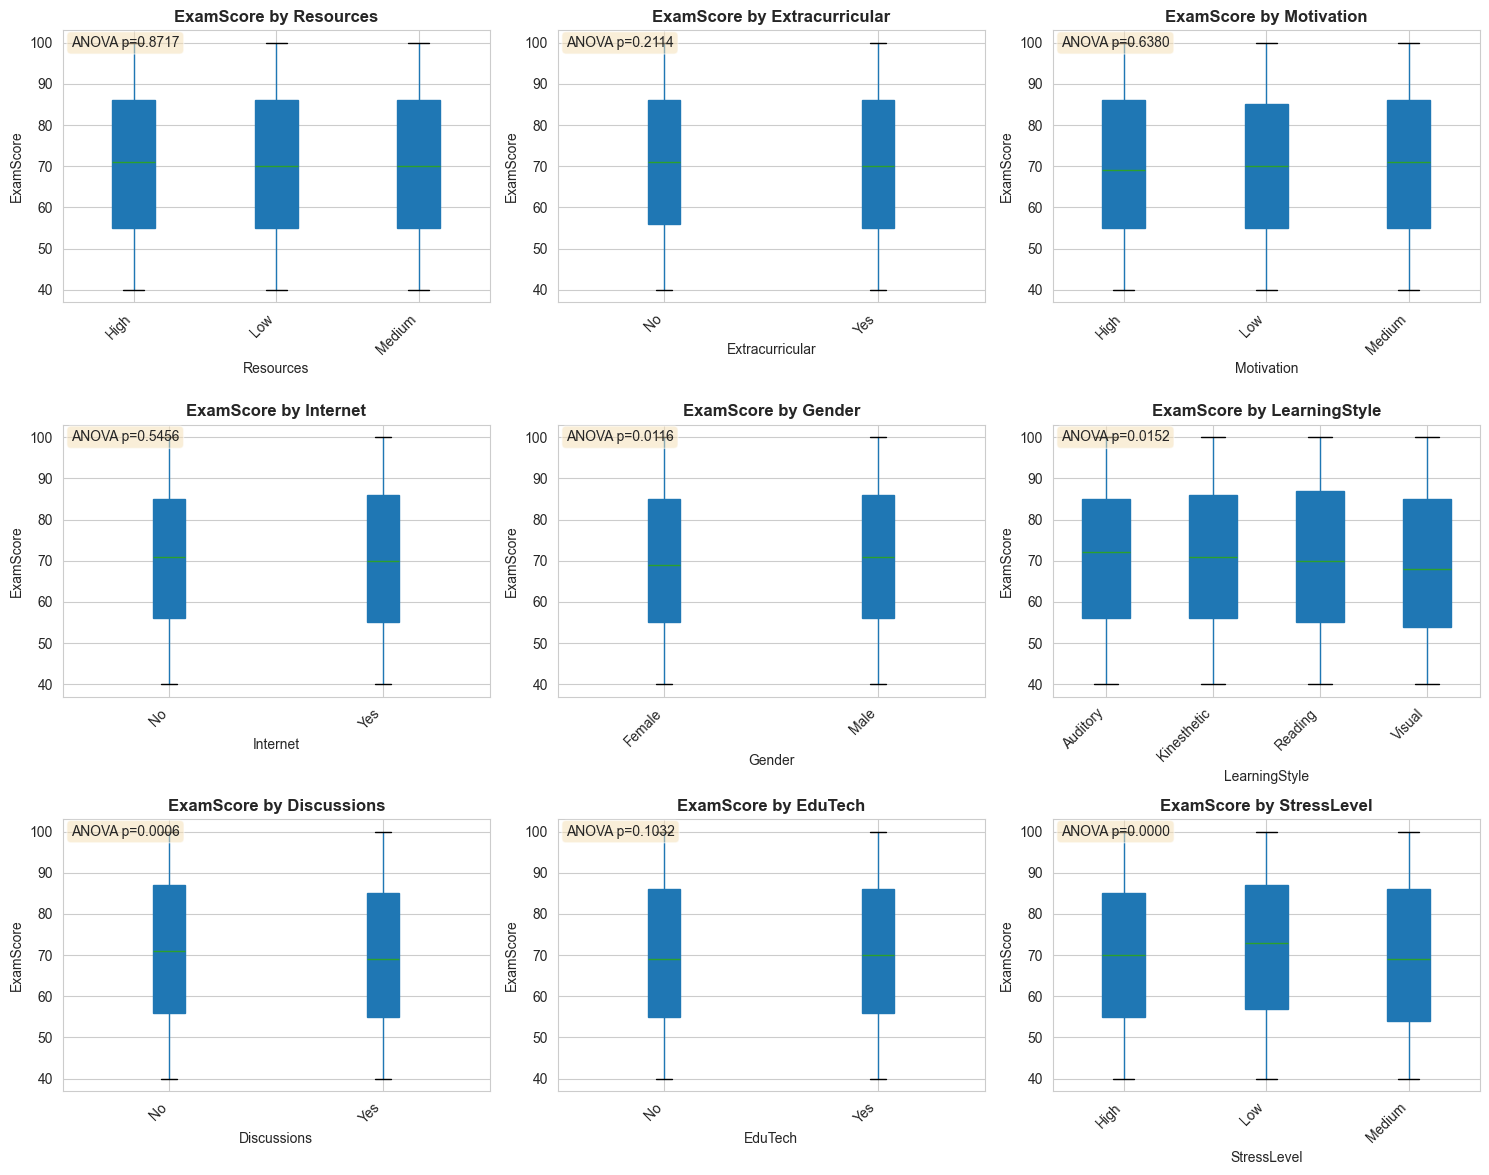

In [338]:
n_cat_plots = min(len(categorical_vars_no_grade), 9)
n_rows = (n_cat_plots + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows*4))
axes = axes.flatten() if n_cat_plots > 1 else [axes]

for idx, col in enumerate(categorical_vars_no_grade[:n_cat_plots]):
    ax = axes[idx]

    # Create box plot
    df.boxplot(column=DATASET_TARGET, by=col, ax=ax, patch_artist=True)
    ax.set_title(f'{DATASET_TARGET} by {col}', fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel(DATASET_TARGET)
    plt.sca(ax)
    plt.xticks(rotation=45, ha='right')

    # ANOVA test
    groups = [group[DATASET_TARGET].dropna().values for name, group in df.groupby(col)]
    if len(groups) > 1:
        f_stat, p_val = stats.f_oneway(*groups)
        ax.text(0.02, 0.98, f'ANOVA p={p_val:.4f}',
                transform=ax.transAxes, va='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

for idx in range(n_cat_plots, len(axes)):
    axes[idx].axis('off')

plt.suptitle('')
plt.tight_layout()
plt.show()

# Data Preprocessing

## Data cleaning

In [339]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

## Data Transformation

In [340]:
ordinal_encoder = OrdinalEncoder()
df[ordinal_vars] = ordinal_encoder.fit_transform(df[[cols for cols in categorical_vars if cols not in binary_vars]])

for col in binary_vars:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# One-hot encoding
df = pd.get_dummies(df, columns=['LearningStyle'], drop_first=False)
df

StudyHours  Attendance  Resources  Extracurricular  Motivation  \
0              19          64        2.0                0         1.0   
1              19          64        2.0                0         1.0   
2              19          64        2.0                0         1.0   
3              19          64        2.0                1         1.0   
4              19          64        2.0                1         1.0   
...           ...         ...        ...              ...         ...   
13998          30          62        1.0                1         2.0   
13999          30          62        1.0                1         2.0   
14000          22          90        0.0                0         2.0   
14001          22          90        0.0                0         2.0   
14002          10          86        0.0                1         0.0   

       Internet  Gender  Age  OnlineCourses  Discussions  \
0             1       0   19              8            1   
1             1       0   23             16            0   
2             1       0   28             19            0   
3             1       0   19              8            1   
4             1       0   23             16            0   
...         ...     ...  ...            ...          ...   
13998         1       0   22              2            1   
13999         1       0   23             12            1   
14000         1       0   23              0            1   
14001         1       0   29             16            0   
14002         1       0   18              8            1   

       AssignmentCompletion  ExamScore  EduTech  StressLevel  FinalGrade  \
0                        59         40        0          2.0         4.0   
1                        90         66        0          2.0         3.0   
2                        67         99        1          2.0         0.0   
3                        59         40        0          2.0         4.0   
4                        90         66        0          2.0         3.0   
...                     ...        ...      ...          ...         ...   
13998                   100         71        1          0.0         2.0   
13999                    72         55        1          2.0         4.0   
14000                    80         56        0          1.0         4.0   
14001                    50         62        1          0.0         3.0   
14002                    66         77        1          0.0         2.0   

       LearningStyle_0.0  LearningStyle_1.0  LearningStyle_2.0  \
0                  False               True              False   
1                  False              False               True   
2                   True              False              False   
3                  False               True              False   
4                  False              False               True   
...                  ...                ...                ...   
13998              False               True              False   
13999              False              False               True   
14000              False              False               True   
14001              False               True              False   
14002              False               True              False   

       LearningStyle_3.0  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False  
...                  ...  
13998              False  
13999              False  
14000              False  
14001              False  
14002              False  

[12469 rows x 19 columns]

In [341]:
class DataTransformer:
    """
    Comprehensive data transformation toolkit for handling skewness and kurtosis
    """

    def __init__(self, df):
        self.df = df.copy()
        self.transformations = {}
        self.transformation_results = []

    def analyze_distributions(self, columns=None):
        """
        Analyze skewness and kurtosis for numerical columns
        """
        if columns is None:
            columns = self.df.select_dtypes(include=[np.number]).columns.tolist()

        results = []
        for col in columns:
            if self.df[col].isnull().all():
                continue

            data = self.df[col].dropna()
            results.append({
                'Column': col,
                'Skewness': data.skew(),
                'Kurtosis': data.kurtosis(),
                'Mean': data.mean(),
                'Median': data.median(),
                'Std': data.std(),
                'Min': data.min(),
                'Max': data.max(),
                'Has_Negative': (data < 0).any(),
                'Has_Zero': (data == 0).any()
            })

        return pd.DataFrame(results)

    def classify_skewness(self, skew_value):
        """Classify skewness level"""
        abs_skew = abs(skew_value)
        if abs_skew < 0.5:
            return "Normal"
        elif abs_skew < 1.0:
            return "Moderate"
        else:
            return "High"

    def log_transform(self, column, constant=1):
        """
        Log transformation: log(x + constant)
        Best for: Right-skewed data without zeros/negatives
        """
        data = self.df[column].copy()

        # Handle zeros and negatives
        min_val = data.min()
        if min_val <= 0:
            shift = abs(min_val) + constant
            transformed = np.log(data + shift)
            method_used = f"log(x + {shift:.2f})"
        else:
            transformed = np.log(data + constant)
            method_used = f"log(x + {constant})"

        return transformed, method_used

    def sqrt_transform(self, column):
        """
        Square root transformation: sqrt(x)
        Best for: Moderate right-skewed data
        """
        data = self.df[column].copy()

        # Handle negatives
        if data.min() < 0:
            shift = abs(data.min()) + 1
            transformed = np.sqrt(data + shift)
            method_used = f"sqrt(x + {shift:.2f})"
        else:
            transformed = np.sqrt(data)
            method_used = "sqrt(x)"

        return transformed, method_used

    def cube_root_transform(self, column):
        """
        Cube root transformation: x^(1/3)
        Best for: Works with negative values
        """
        data = self.df[column].copy()
        transformed = np.sign(data) * np.abs(data) ** (1/3)
        return transformed, "cbrt(x)"

    def reciprocal_transform(self, column):
        """
        Reciprocal transformation: 1/x
        Best for: Severe right-skewed data
        """
        data = self.df[column].copy()

        # Avoid division by zero
        if (data == 0).any():
            data = data + 1e-10

        transformed = 1 / data
        return transformed, "1/x"

    def boxcox_transform(self, column):
        """
        Box-Cox transformation: Automatically finds optimal lambda
        Best for: Right-skewed data (requires positive values)
        """
        data = self.df[column].dropna()

        if data.min() <= 0:
            shift = abs(data.min()) + 1
            data = data + shift
            method_used = f"boxcox(x + {shift:.2f})"
        else:
            method_used = "boxcox(x)"

        try:
            transformed_full = pd.Series(index=self.df.index, dtype=float)
            transformed, lambda_param = boxcox(data)
            transformed_full[data.index] = transformed
            return transformed_full, f"{method_used}, λ={lambda_param:.3f}"
        except:
            return self.df[column], "boxcox_failed"

    def yeojohnson_transform(self, column):
        """
        Yeo-Johnson transformation: Like Box-Cox but handles negatives and zeros
        Best for: Any distribution
        """
        data = self.df[column].dropna()

        try:
            transformed_full = pd.Series(index=self.df.index, dtype=float)
            transformed, lambda_param = yeojohnson(data)
            transformed_full[data.index] = transformed
            return transformed_full, f"yeo-johnson, λ={lambda_param:.3f}"
        except:
            return self.df[column], "yeojohnson_failed"

    def quantile_transform(self, column, n_quantiles=1000):
        """
        Quantile transformation: Maps to uniform or normal distribution
        Best for: Non-linear transformations, robust to outliers
        """
        data = self.df[column].values.reshape(-1, 1)

        qt = QuantileTransformer(n_quantiles=n_quantiles,
                                 output_distribution='normal',
                                 random_state=42)
        transformed = qt.fit_transform(data).flatten()

        return pd.Series(transformed, index=self.df.index), "quantile_normal"

    def winsorize(self, column, limits=(0.05, 0.05)):
        """
        Winsorization: Caps extreme values at percentiles
        Best for: Preserving distribution shape while handling outliers
        """
        from scipy.stats.mstats import winsorize
        data = self.df[column].values
        transformed = winsorize(data, limits=limits)
        return pd.Series(transformed, index=self.df.index), f"winsorize({limits[0]}, {limits[1]})"

    def test_transformations(self, column, methods='auto'):
        """
        Test multiple transformations and compare results

        Parameters:
        -----------
        column : str
            Column name to transform
        methods : list or 'auto'
            List of methods to test or 'auto' for automatic selection
        """
        if methods == 'auto':
            # Auto-select based on data characteristics
            data = self.df[column].dropna()
            has_negative = (data < 0).any()
            has_zero = (data == 0).any()

            if has_negative:
                methods = ['cube_root', 'yeojohnson', 'quantile', 'winsorize']
            elif has_zero:
                methods = ['log', 'sqrt', 'yeojohnson', 'quantile', 'winsorize']
            else:
                methods = ['log', 'sqrt', 'boxcox', 'yeojohnson', 'quantile', 'winsorize']

        original_data = self.df[column].dropna()
        original_skew = original_data.skew()
        original_kurt = original_data.kurtosis()

        results = [{
            'Method': 'Original',
            'Skewness': original_skew,
            'Kurtosis': original_kurt,
            'Abs_Skew': abs(original_skew),
            'Transformation': None
        }]

        transformations = {}

        for method in methods:
            try:
                if method == 'log':
                    transformed, method_name = self.log_transform(column)
                elif method == 'sqrt':
                    transformed, method_name = self.sqrt_transform(column)
                elif method == 'cube_root':
                    transformed, method_name = self.cube_root_transform(column)
                elif method == 'reciprocal':
                    transformed, method_name = self.reciprocal_transform(column)
                elif method == 'boxcox':
                    transformed, method_name = self.boxcox_transform(column)
                elif method == 'yeojohnson':
                    transformed, method_name = self.yeojohnson_transform(column)
                elif method == 'quantile':
                    transformed, method_name = self.quantile_transform(column)
                elif method == 'winsorize':
                    transformed, method_name = self.winsorize(column)
                else:
                    continue

                transformed_clean = transformed.dropna()

                if len(transformed_clean) > 0:
                    skew = transformed_clean.skew()
                    kurt = transformed_clean.kurtosis()

                    results.append({
                        'Method': method_name,
                        'Skewness': skew,
                        'Kurtosis': kurt,
                        'Abs_Skew': abs(skew),
                        'Transformation': method
                    })

                    transformations[method] = transformed

            except Exception as e:
                print(f"Warning: {method} failed for {column}: {str(e)}")
                continue

        results_df = pd.DataFrame(results).sort_values('Abs_Skew')

        return results_df, transformations

    def visualize_transformations(self, column, transformations, results_df):
        """
        Visualize original and transformed distributions
        """
        n_transforms = len(transformations) + 1  # +1 for original
        n_cols = 3
        n_rows = (n_transforms + n_cols - 1) // n_cols

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
        axes = axes.flatten() if n_transforms > 1 else [axes]

        # Plot original
        ax = axes[0]
        original_data = self.df[column].dropna()
        ax.hist(original_data, bins=30, alpha=0.7, color='skyblue', edgecolor='black', density=True)
        original_data.plot(kind='kde', ax=ax, color='red', linewidth=2)
        ax.set_title(f'Original\nSkew: {original_data.skew():.3f}, Kurt: {original_data.kurtosis():.3f}',
                    fontweight='bold', fontsize=11)
        ax.set_xlabel(column)
        ax.grid(alpha=0.3)

        # Plot transformations
        for idx, (method, transformed) in enumerate(transformations.items(), 1):
            ax = axes[idx]
            transformed_clean = transformed.dropna()

            ax.hist(transformed_clean, bins=30, alpha=0.7, color='lightgreen',
                   edgecolor='black', density=True)
            transformed_clean.plot(kind='kde', ax=ax, color='darkgreen', linewidth=2)

            method_name = results_df[results_df['Transformation'] == method]['Method'].values[0]
            skew = transformed_clean.skew()
            kurt = transformed_clean.kurtosis()

            ax.set_title(f'{method_name}\nSkew: {skew:.3f}, Kurt: {kurt:.3f}',
                        fontweight='bold', fontsize=11)
            ax.set_xlabel(f'{column} (transformed)')
            ax.grid(alpha=0.3)

        # Hide empty subplots
        for idx in range(n_transforms, len(axes)):
            axes[idx].axis('off')

        plt.suptitle(f'Transformation Comparison: {column}',
                    fontsize=14, fontweight='bold', y=1.00)
        plt.tight_layout()

        return fig

    def auto_transform_dataset(self, columns=None, skew_threshold=0.5):
        """
        Automatically transform all skewed columns in the dataset

        Parameters:
        -----------
        columns : list or None
            Columns to transform (None = all numerical)
        skew_threshold : float
            Absolute skewness threshold to trigger transformation
        """
        if columns is None:
            columns = self.df.select_dtypes(include=[np.number]).columns.tolist()

        transformed_df = self.df.copy()
        transformation_summary = []

        for col in columns:
            original_skew = abs(self.df[col].skew())

            if original_skew < skew_threshold:
                print(f"\n✓ {col}: Skewness {original_skew:.3f} < {skew_threshold} - No transformation needed")
                transformation_summary.append({
                    'Column': col,
                    'Original_Skew': original_skew,
                    'Transformed_Skew': original_skew,
                    'Method': 'None',
                    'Improvement': 0
                })
                continue

            print(f"\n{'='*60}")
            print(f"Transforming: {col} (Skewness: {original_skew:.3f})")
            print(f"{'='*60}")

            # Test transformations
            results_df, transformations = self.test_transformations(col)
            print(results_df.to_string(index=False))

            # Remove invalid rows
            valid_results = results_df[results_df['Transformation'].notna()]
            
            # If no valid transformation exists, keep original
            if valid_results.empty:
                transformed_df[col] = self.df[col]
            continue

        summary_df = pd.DataFrame(transformation_summary)

        print("\n" + "="*80)
        print("TRANSFORMATION SUMMARY")
        print("="*80)
        print(summary_df.to_string(index=False))

        return transformed_df, summary_df


1. DISTRIBUTION ANALYSIS
--------------------------------------------------------------------------------
              Column  Skewness  Kurtosis      Mean  Median       Std  Min   Max  Has_Negative  Has_Zero
          StudyHours  0.085616 -0.262312 20.034405    20.0  6.049485  5.0  44.0         False     False
          Attendance -0.016996 -1.170868 80.239233    80.0 11.469028 60.0 100.0         False     False
           Resources -0.347080 -1.599652  1.175315     1.0  0.872933  0.0   2.0         False      True
     Extracurricular -0.337238 -1.886573  0.583126     1.0  0.493061  0.0   1.0         False      True
          Motivation -0.534376 -1.195866  1.278210     1.0  0.787591  0.0   2.0         False      True
            Internet -3.025164  7.152767  0.917074     1.0  0.275781  0.0   1.0         False      True
              Gender -0.154944 -1.976309  0.538616     1.0  0.498527  0.0   1.0         False      True
                 Age -0.011701 -1.260265 23.529152    24.0  3

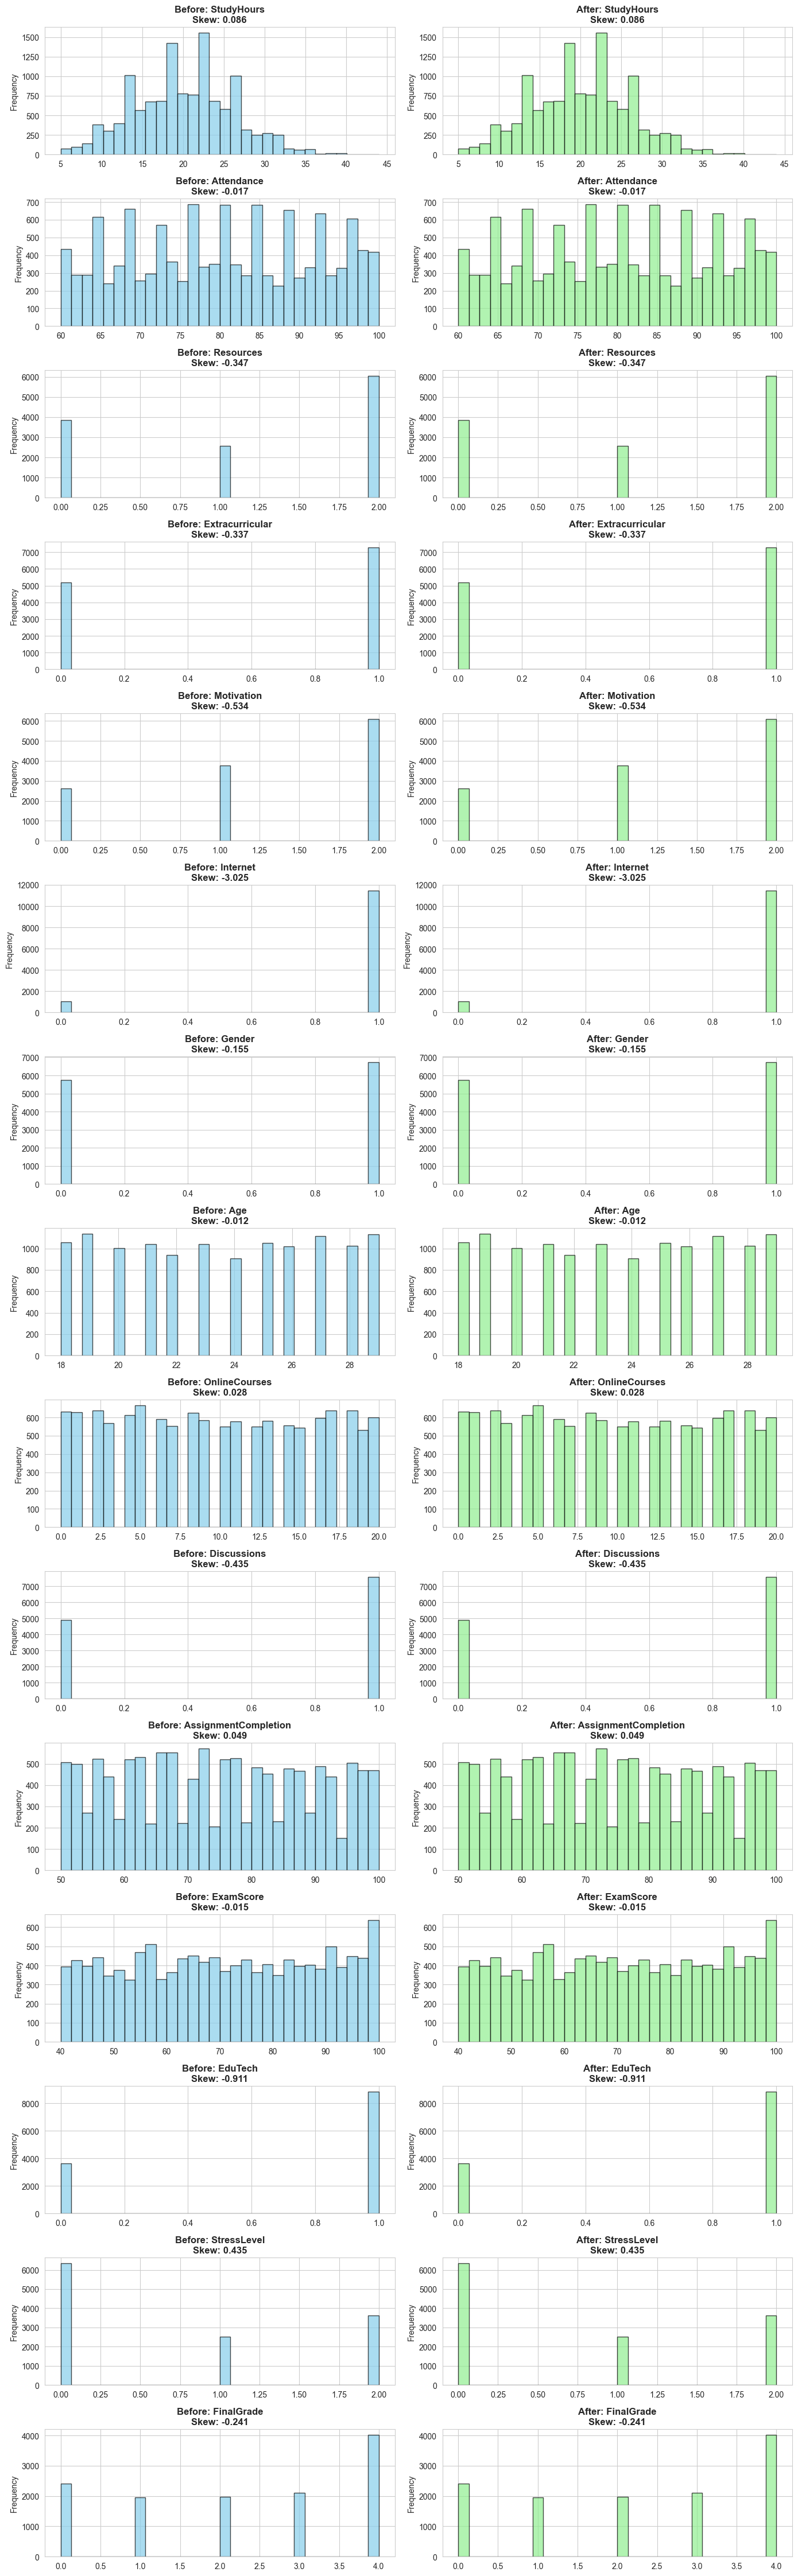

In [342]:
transformer = DataTransformer(df)

# Analyze distributions
print("\n1. DISTRIBUTION ANALYSIS")
print("-"*80)
dist_analysis = transformer.analyze_distributions()
print(dist_analysis.to_string(index=False))

# Auto-transform all skewed columns
print("\n2. AUTOMATIC TRANSFORMATION")
print("-"*80)
transformed_df, summary = transformer.auto_transform_dataset(
    skew_threshold=0.5)

# Compare before and after
print("\n3. BEFORE vs AFTER COMPARISON")
print("-"*80)

continous_vars = df.select_dtypes(include=[np.number]).columns

fig, axes = plt.subplots(len(continous_vars), 2, figsize=(14, len(continous_vars) * 3))

for idx, col in enumerate(continous_vars):
    # Before
    ax = axes[idx, 0] if len(continous_vars) > 1 else axes[0]
    df[col].hist(bins=30, alpha=0.7, color='skyblue', edgecolor='black', ax=ax)
    ax.set_title(f'Before: {col}\nSkew: {df[col].skew():.3f}', fontweight='bold')
    ax.set_ylabel('Frequency')

    # After
    ax = axes[idx, 1] if len(continous_vars) > 1 else axes[1]
    transformed_df[col].hist(bins=30, alpha=0.7, color='lightgreen', edgecolor='black', ax=ax)
    ax.set_title(f'After: {col}\nSkew: {transformed_df[col].skew():.3f}', fontweight='bold')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Model implementation

In [343]:
X, y = df.drop(columns=[DATASET_TARGET]), df[DATASET_TARGET]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [344]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [345]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [346]:
model_names = []
r2_scores_test = []
r2_scores_train = []
rmse_scores_test = []
rmse_scores_train = []
mae_scores_test = []
mae_scores_train = []

for name, model in models.items():
    # Train model
        # For models that support partial_fit or warm_start, show incremental progress
    if name in ["XGBRegressor", "CatBoosting Regressor", "AdaBoost Regressor"]:
        # These models train iteratively, we can monitor their progress
        if name == "XGBRegressor":
            model_verbose = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
            eval_set = [(X_train, y_train), (X_test, y_test)]
            model_verbose.fit(X_train, y_train, eval_set=eval_set, verbose=True)
            model = model_verbose

        elif name == "CatBoosting Regressor":
            model_verbose = CatBoostRegressor(iterations=100, verbose=20, random_state=42)  # Print every 20 iterations
            model_verbose.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=True)
            model = model_verbose

        elif name == "AdaBoost Regressor":
            # AdaBoost - show progress with manual iteration
            n_estimators = 50
            for i in [10, 20, 30, 40, 50]:
                model_temp = AdaBoostRegressor(n_estimators=i, random_state=42)
                model_temp.fit(X_train, y_train)

                train_pred = model_temp.predict(X_train)
                test_pred = model_temp.predict(X_test)

                train_r2 = evaluate_model(y_train, train_pred)[2]
                test_r2 = evaluate_model(y_test, test_pred)[2]

                print(f"   Estimators: {i:3d} | Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")

            model.fit(X_train, y_train)

        elif name == "Random Forest Regressor":
            # Random Forest - show progress with manual iteration
            for i in [10, 25, 50, 75, 100]:
                model_temp = RandomForestRegressor(n_estimators=i, random_state=42)
                model_temp.fit(X_train, y_train)

                train_pred = model_temp.predict(X_train)
                test_pred = model_temp.predict(X_test)

                train_r2 = evaluate_model(y_train, train_pred)[2]
                test_r2 = evaluate_model(y_test, test_pred)[2]

                print(f"   Trees: {i:3d} | Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")

            model.fit(X_train, y_train)
    else:
        # For models without iterative training, use learning curves
        print(f"   Training on incremental data sizes...")
        train_sizes = [0.2, 0.4, 0.6, 0.8, 1.0]

        for size in train_sizes:
            n_samples = int(len(X_train) * size)
            X_train_partial = X_train[:n_samples]
            y_train_partial = y_train[:n_samples]

            model_temp = type(model)(**model.get_params())
            model_temp.fit(X_train_partial, y_train_partial)

            train_pred = model_temp.predict(X_train_partial)
            test_pred = model_temp.predict(X_test)

            train_r2 = evaluate_model(y_train_partial, train_pred)[2]
            test_r2 = evaluate_model(y_test, test_pred)[2]

            print(f"   Data size: {size*100:5.0f}% ({n_samples:4d} samples) | Train R²: {train_r2:.4f} | Test R²: {test_r2:.4f}")

        # Final fit on full data
        model.fit(X_train, y_train)

    # Make predictions on the test set
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
     # Evaluate Training dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    # Evaluate Test dataset
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Calculate difference to check overfitting
    r2_diff = model_train_r2 - model_test_r2

    # Determine overfitting status
    if r2_diff > 0.1:
        status = "Overfitting"
    elif r2_diff < -0.05:
        status = "Underfitting"
    else:
        status = "Good Fit"

    # Store results
    model_names.append(name)
    mae_scores_test.append(model_test_mae)
    mae_scores_train.append(model_train_mae)
    rmse_scores_test.append(model_test_rmse)
    rmse_scores_train.append(model_train_rmse)
    r2_scores_test.append(model_test_r2)
    r2_scores_train.append(model_train_r2)

# Create a DataFrame for easy viewing
model_performance_df = pd.DataFrame({
    'Model': model_names,
    'R2 (Train)': r2_scores_train,
    'R2 (Test)': r2_scores_test,
    'R2 Diff': [train - test for train, test in zip(r2_scores_train, r2_scores_test)],
    'RMSE (Train)': rmse_scores_train,
    'RMSE (Test)': rmse_scores_test,
    'MAE (Train)': mae_scores_train,
    'MAE (Test)': mae_scores_test
})

# Display the DataFrame, sorted by R2 Score for better comparison
display(model_performance_df.sort_values(by='R2 (Test)', ascending=False))

   Training on incremental data sizes...
   Data size:    20% (1995 samples) | Train R²: 0.9396 | Test R²: 0.9408
   Data size:    40% (3990 samples) | Train R²: 0.9398 | Test R²: 0.9409
   Data size:    60% (5985 samples) | Train R²: 0.9404 | Test R²: 0.9409
   Data size:    80% (7980 samples) | Train R²: 0.9402 | Test R²: 0.9409
   Data size:   100% (9975 samples) | Train R²: 0.9405 | Test R²: 0.9410
   Training on incremental data sizes...
   Data size:    20% (1995 samples) | Train R²: 0.9374 | Test R²: 0.9394
   Data size:    40% (3990 samples) | Train R²: 0.9380 | Test R²: 0.9394
   Data size:    60% (5985 samples) | Train R²: 0.9387 | Test R²: 0.9396
   Data size:    80% (7980 samples) | Train R²: 0.9385 | Test R²: 0.9397
   Data size:   100% (9975 samples) | Train R²: 0.9389 | Test R²: 0.9396
   Training on incremental data sizes...
   Data size:    20% (1995 samples) | Train R²: 0.9396 | Test R²: 0.9408
   Data size:    40% (3990 samples) | Train R²: 0.9398 | Test R²: 0.9409
 

Model  R2 (Train)  R2 (Test)   R2 Diff  RMSE (Train)  \
4  Random Forest Regressor    0.998452   0.988996  0.009456      0.695632   
5             XGBRegressor    0.979130   0.970157  0.008973      2.554558   
6    CatBoosting Regressor    0.975749   0.967194  0.008556      2.753703   
7       AdaBoost Regressor    0.947418   0.947939 -0.000522      4.054871   
0        Linear Regression    0.940504   0.940969 -0.000465      4.313201   
2                    Ridge    0.940504   0.940969 -0.000465      4.313201   
1                    Lasso    0.938866   0.939631 -0.000765      4.372169   
3    K-Neighbors Regressor    0.832649   0.708440  0.124209      7.233868   

   RMSE (Test)  MAE (Train)  MAE (Test)  
4     1.861645     0.391569    1.035180  
5     3.065837     2.014158    2.388382  
6     3.214472     2.214661    2.538202  
7     4.049355     3.341649    3.322151  
0     4.311911     3.523933    3.505574  
2     4.311912     3.523901    3.505553  
1     4.360502     3.535792    3.518684  
3     9.582846     4.528521    6.560946

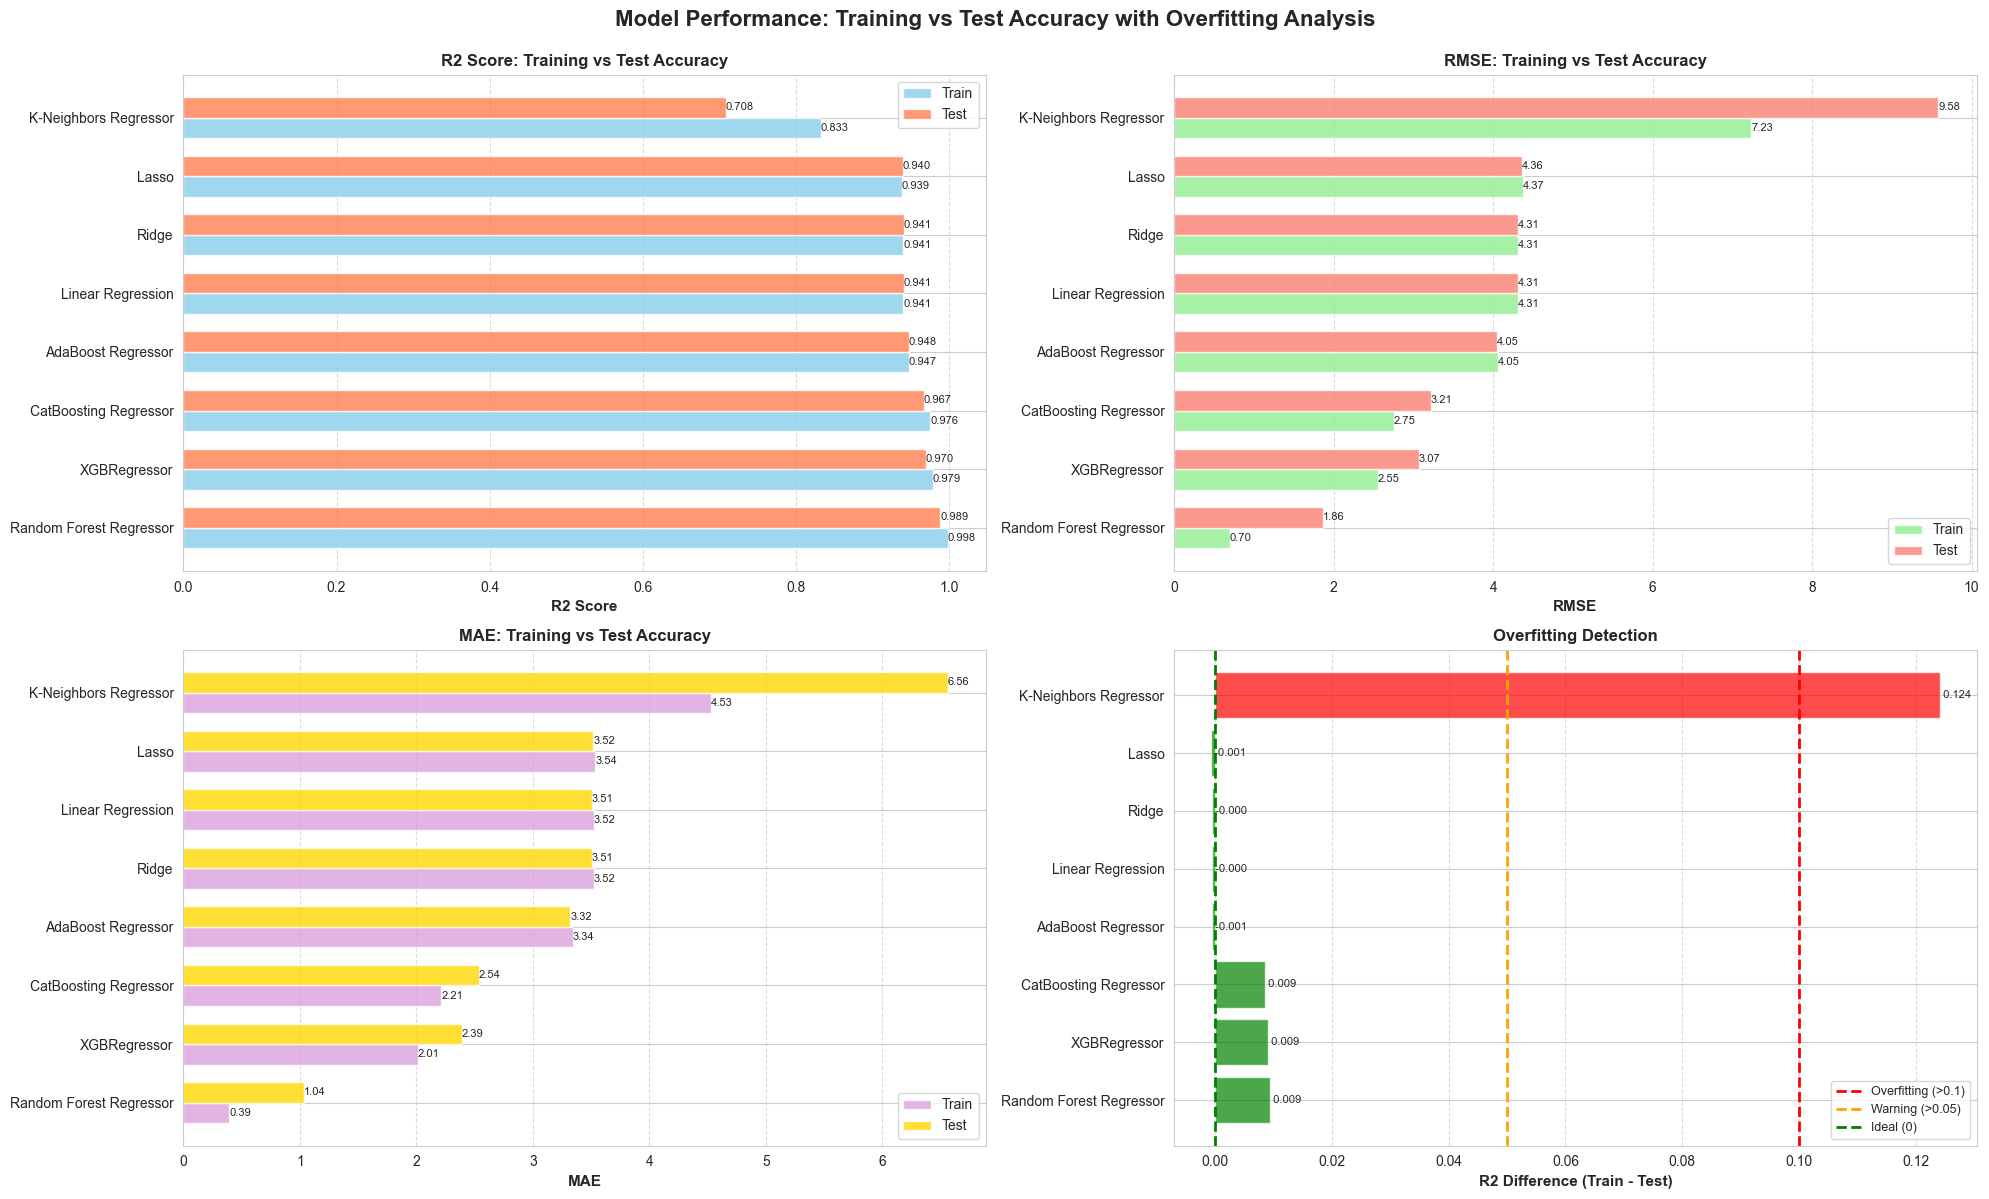

In [347]:

# Enhanced visualization
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Plot 1: R2 Score Comparison (Train vs Test)
df_sorted = model_performance_df.sort_values(by='R2 (Test)', ascending=False)
x = np.arange(len(df_sorted))
width = 0.35

axes[0, 0].barh(x - width/2, df_sorted['R2 (Train)'], width, label='Train', alpha=0.8, color='skyblue')
axes[0, 0].barh(x + width/2, df_sorted['R2 (Test)'], width, label='Test', alpha=0.8, color='coral')
axes[0, 0].set_yticks(x)
axes[0, 0].set_yticklabels(df_sorted['Model'])
axes[0, 0].set_xlabel('R2 Score', fontweight='bold', fontsize=11)
axes[0, 0].set_title('R2 Score: Training vs Test Accuracy', fontweight='bold', fontsize=12)
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(axis='x', linestyle='--', alpha=0.7)
# Add value labels on bars
for i, (train_val, test_val) in enumerate(zip(df_sorted['R2 (Train)'], df_sorted['R2 (Test)'])):
    axes[0, 0].text(train_val, i - width/2, f'{train_val:.3f}', va='center', ha='left', fontsize=8)
    axes[0, 0].text(test_val, i + width/2, f'{test_val:.3f}', va='center', ha='left', fontsize=8)

# Plot 2: RMSE Comparison (Train vs Test)
df_sorted_rmse = model_performance_df.sort_values(by='RMSE (Test)', ascending=True)
x_rmse = np.arange(len(df_sorted_rmse))

axes[0, 1].barh(x_rmse - width/2, df_sorted_rmse['RMSE (Train)'], width, label='Train', alpha=0.8, color='lightgreen')
axes[0, 1].barh(x_rmse + width/2, df_sorted_rmse['RMSE (Test)'], width, label='Test', alpha=0.8, color='salmon')
axes[0, 1].set_yticks(x_rmse)
axes[0, 1].set_yticklabels(df_sorted_rmse['Model'])
axes[0, 1].set_xlabel('RMSE', fontweight='bold', fontsize=11)
axes[0, 1].set_title('RMSE: Training vs Test Accuracy', fontweight='bold', fontsize=12)
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(axis='x', linestyle='--', alpha=0.7)
# Add value labels on bars
for i, (train_val, test_val) in enumerate(zip(df_sorted_rmse['RMSE (Train)'], df_sorted_rmse['RMSE (Test)'])):
    axes[0, 1].text(train_val, i - width/2, f'{train_val:.2f}', va='center', ha='left', fontsize=8)
    axes[0, 1].text(test_val, i + width/2, f'{test_val:.2f}', va='center', ha='left', fontsize=8)

# Plot 3: MAE Comparison (Train vs Test)
df_sorted_mae = model_performance_df.sort_values(by='MAE (Test)', ascending=True)
x_mae = np.arange(len(df_sorted_mae))

axes[1, 0].barh(x_mae - width/2, df_sorted_mae['MAE (Train)'], width, label='Train', alpha=0.8, color='plum')
axes[1, 0].barh(x_mae + width/2, df_sorted_mae['MAE (Test)'], width, label='Test', alpha=0.8, color='gold')
axes[1, 0].set_yticks(x_mae)
axes[1, 0].set_yticklabels(df_sorted_mae['Model'])
axes[1, 0].set_xlabel('MAE', fontweight='bold', fontsize=11)
axes[1, 0].set_title('MAE: Training vs Test Accuracy', fontweight='bold', fontsize=12)
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(axis='x', linestyle='--', alpha=0.7)
# Add value labels on bars
for i, (train_val, test_val) in enumerate(zip(df_sorted_mae['MAE (Train)'], df_sorted_mae['MAE (Test)'])):
    axes[1, 0].text(train_val, i - width/2, f'{train_val:.2f}', va='center', ha='left', fontsize=8)
    axes[1, 0].text(test_val, i + width/2, f'{test_val:.2f}', va='center', ha='left', fontsize=8)

# Plot 4: R2 Score Difference (Overfitting Indicator)
colors = ['red' if diff > 0.1 else 'orange' if diff > 0.05 else 'green' for diff in df_sorted['R2 Diff']]
axes[1, 1].barh(df_sorted['Model'], df_sorted['R2 Diff'], color=colors, alpha=0.7)
axes[1, 1].axvline(x=0.1, color='red', linestyle='--', label='Overfitting (>0.1)', linewidth=2)
axes[1, 1].axvline(x=0.05, color='orange', linestyle='--', label='Warning (>0.05)', linewidth=2)
axes[1, 1].axvline(x=0, color='green', linestyle='--', label='Ideal (0)', linewidth=2)
axes[1, 1].set_xlabel('R2 Difference (Train - Test)', fontweight='bold', fontsize=11)
axes[1, 1].set_title('Overfitting Detection', fontweight='bold', fontsize=12)
axes[1, 1].legend(fontsize=9)
axes[1, 1].grid(axis='x', linestyle='--', alpha=0.7)
# Add value labels
for i, (model, diff) in enumerate(zip(df_sorted['Model'], df_sorted['R2 Diff'])):
    axes[1, 1].text(diff, i, f' {diff:.3f}', va='center', fontsize=8)

plt.suptitle('Model Performance: Training vs Test Accuracy with Overfitting Analysis',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()